# Computer Vision and Deep Learning - Laboratory 4
 
The main objective of this laboratory is to familiarize you with the training process of a neural network. More specifically, you'll follow this ["recipe"](!http://karpathy.github.io/2019/04/25/recipe/) for training  neural networks proposed by Andrew Karpathy.
You'll go through all the steps of training, data preparation, debugging, hyper-parameter tuning.
 
In the second part of the laboratory, you'll experiment with _transfer learning_ and _fine-tuning_.  Transfer learning is a concept from machine learning which allows you to reuse the knowledge gained while solving a problem (in our case the CNN weights) and applying it to solve a similar problem. This is useful when you are facing a classification problem with a small training dataset.


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import threading
import cv2.cv2 as cv2
from tensorflow import keras
from keras import layers
import random

# Data loading. Training a neural network. Tuning hyper-parameters. 

Your task for the first part of the laboratory is to train a convolutional nerual network for image classification. You can choose any dataset for image classification. By default you can use the [Oxford Pets dataset](!https://www.robots.ox.ac.uk/~vgg/data/pets/), but you can choose a dataset that you will be using for your project or an interesting dataset from [Kaggle](!https://www.kaggle.com/datasets?search=image).

So the first step would be download your training data.

In [2]:
# !wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz # replace it with the link to the dataset that you will be using
# !wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz 

# !tar -xvf images.tar.gz
# !tar -xvf annotations.tar.gz 

--2021-12-02 23:06:09--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
SSL_INIT
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  1.49MB/s    in 9m 55s  

2021-12-02 23:16:07 (1.27 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2021-12-02 23:16:07--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
SSL_INIT
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/x-gzip]
Savin

images/boxer_33.jpg
images/Abyssinian_185.jpg
images/pomeranian_191.jpg
images/Maine_Coon_51.jpg
images/newfoundland_134.jpg
images/great_pyrenees_102.jpg
images/Egyptian_Mau_73.jpg
images/British_Shorthair_84.jpg
images/British_Shorthair_72.jpg
images/keeshond_151.jpg
images/keeshond_86.jpg
images/Bengal_125.jpg
images/english_cocker_spaniel_185.jpg
images/leonberger_143.jpg
images/shiba_inu_33.jpg
images/japanese_chin_78.jpg
images/wheaten_terrier_15.jpg
images/great_pyrenees_28.jpg
images/Maine_Coon_69.jpg
images/havanese_112.jpg
images/saint_bernard_173.jpg
images/Bombay_123.jpg
images/pug_23.jpg
images/chihuahua_20.jpg
images/Sphynx_246.jpg
images/english_cocker_spaniel_96.jpg
images/Russian_Blue_119.jpg
images/english_cocker_spaniel_57.jpg
images/Bombay_205.jpg
images/keeshond_190.jpg
images/pomeranian_87.jpg
images/basset_hound_113.jpg
images/beagle_148.jpg
images/British_Shorthair_199.jpg
images/Sphynx_54.jpg
images/yorkshire_terrier_126.jpg
images/basset_hound_107.jpg
images/y

images/beagle_39.jpg
images/Persian_174.jpg
images/Ragdoll_119.jpg
images/British_Shorthair_265.jpg
images/havanese_138.jpg
images/Abyssinian_173.jpg
images/shiba_inu_41.jpg
images/British_Shorthair_141.jpg
images/english_cocker_spaniel_86.jpg
images/miniature_pinscher_13.jpg
images/Egyptian_Mau_188.jpg
images/staffordshire_bull_terrier_200.jpg
images/Abyssinian_220.jpg
images/Russian_Blue_185.jpg
images/havanese_22.jpg
images/Bengal_101.jpg
images/leonberger_68.jpg
images/samoyed_41.jpg
images/beagle_153.jpg
images/Abyssinian_106.jpg
images/shiba_inu_76.jpg
images/Sphynx_115.jpg
images/boxer_92.jpg
images/american_pit_bull_terrier_102.jpg
images/boxer_6.jpg
images/Birman_111.jpg
images/pug_18.jpg
images/saint_bernard_190.jpg
images/wheaten_terrier_11.jpg
images/beagle_8.jpg
images/scottish_terrier_197.jpg
images/leonberger_71.jpg
images/newfoundland_96.jpg
images/chihuahua_75.jpg
images/yorkshire_terrier_20.jpg
images/great_pyrenees_52.jpg
images/havanese_84.jpg
images/boxer_183.jpg
i

images/havanese_45.jpg
images/leonberger_181.jpg
images/Bombay_25.jpg
images/Russian_Blue_78.jpg
images/pug_169.jpg
images/german_shorthaired_87.jpg
images/newfoundland_26.jpg
images/pomeranian_47.jpg
images/boxer_59.jpg
images/shiba_inu_13.jpg
images/keeshond_157.jpg
images/wheaten_terrier_116.jpg
images/english_cocker_spaniel_167.jpg
images/basset_hound_163.jpg
images/British_Shorthair_158.jpg
images/shiba_inu_124.jpg
images/wheaten_terrier_76.jpg
images/beagle_50.jpg
images/english_cocker_spaniel_94.jpg
images/pomeranian_56.jpg
images/Persian_25.jpg
images/pomeranian_85.jpg
images/Siamese_64.jpg
images/Russian_Blue_45.jpg
images/Ragdoll_252.jpg
images/Egyptian_Mau_148.jpg
images/Abyssinian_77.jpg
images/english_cocker_spaniel_163.jpg
images/chihuahua_43.jpg
images/Abyssinian_15.jpg
images/chihuahua_138.jpg
images/keeshond_52.jpg
images/pug_132.jpg
images/great_pyrenees_29.jpg
images/havanese_62.jpg
images/havanese_40.jpg
images/english_cocker_spaniel_84.jpg
images/wheaten_terrier_47

images/Birman_55.jpg
images/saint_bernard_28.jpg
images/Maine_Coon_253.jpg
images/Ragdoll_29.jpg
images/miniature_pinscher_146.jpg
images/japanese_chin_121.jpg
images/Sphynx_232.jpg
images/Russian_Blue_1.jpg
images/havanese_172.jpg
images/Bengal_87.jpg
images/saint_bernard_188.jpg
images/great_pyrenees_5.jpg
images/British_Shorthair_51.jpg
images/saint_bernard_153.jpg
images/wheaten_terrier_46.jpg
images/saint_bernard_115.jpg
images/basset_hound_124.jpg
images/samoyed_104.jpg
images/wheaten_terrier_88.jpg
images/saint_bernard_149.jpg
images/great_pyrenees_95.jpg
images/newfoundland_43.jpg
images/Siamese_173.jpg
images/keeshond_7.jpg
images/British_Shorthair_34.jpg
images/great_pyrenees_99.jpg
images/Russian_Blue_67.jpg
images/saint_bernard_30.jpg
images/Maine_Coon_117.jpg
images/japanese_chin_190.jpg
images/Ragdoll_78.jpg
images/Maine_Coon_191.jpg
images/Birman_19.jpg
images/yorkshire_terrier_196.jpg
images/boxer_10.jpg
images/Sphynx_98.jpg
images/english_cocker_spaniel_90.jpg
images/b

images/Persian_41.jpg
images/samoyed_72.jpg
images/Russian_Blue_220.jpg
images/Maine_Coon_201.jpg
images/japanese_chin_11.jpg
images/german_shorthaired_8.jpg
images/havanese_162.jpg
images/english_cocker_spaniel_141.jpg
images/Bombay_204.jpg
images/Bombay_137.jpg
images/boxer_48.jpg
images/British_Shorthair_40.jpg
images/miniature_pinscher_40.jpg
images/scottish_terrier_57.jpg
images/american_pit_bull_terrier_42.jpg
images/Russian_Blue_162.jpg
images/newfoundland_132.jpg
images/leonberger_11.jpg
images/basset_hound_181.jpg
images/english_setter_131.jpg
images/yorkshire_terrier_73.jpg
images/newfoundland_33.jpg
images/staffordshire_bull_terrier_33.jpg
images/samoyed_199.jpg
images/Bengal_199.jpg
images/Bengal_160.jpg
images/Siamese_59.jpg
images/Birman_181.jpg
images/scottish_terrier_173.jpg
images/staffordshire_bull_terrier_108.jpg
images/British_Shorthair_52.jpg
images/shiba_inu_170.jpg
images/yorkshire_terrier_119.jpg
images/Russian_Blue_21.jpg
images/Sphynx_228.jpg
images/keeshond_1

images/american_pit_bull_terrier_41.jpg
images/staffordshire_bull_terrier_73.jpg
images/chihuahua_140.jpg
images/Bombay_98.jpg
images/english_setter_141.jpg
images/Russian_Blue_128.jpg
images/american_bulldog_86.jpg
images/Sphynx_144.jpg
images/havanese_68.jpg
images/american_bulldog_27.jpg
images/wheaten_terrier_48.jpg
images/Siamese_55.jpg
images/pomeranian_184.jpg
images/yorkshire_terrier_172.jpg
images/american_pit_bull_terrier_24.jpg
images/samoyed_101.jpg
images/pug_137.jpg
images/newfoundland_138.jpg
images/english_cocker_spaniel_115.jpg
images/chihuahua_162.jpg
images/samoyed_21.jpg
images/scottish_terrier_110.jpg
images/japanese_chin_3.jpg
images/Bengal_103.jpg
images/saint_bernard_8.jpg
images/english_setter_63.jpg
images/shiba_inu_117.jpg
images/saint_bernard_167.jpg
images/shiba_inu_109.jpg
images/american_pit_bull_terrier_110.jpg
images/staffordshire_bull_terrier_18.jpg
images/Bengal_32.jpg
images/Bengal_30.jpg
images/basset_hound_68.jpg
images/leonberger_121.jpg
images/ja

images/Bengal_177.jpg
images/german_shorthaired_153.jpg
images/Bombay_185.jpg
images/wheaten_terrier_106.jpg
images/Egyptian_Mau_124.jpg
images/shiba_inu_154.jpg
images/British_Shorthair_168.jpg
images/american_pit_bull_terrier_103.jpg
images/saint_bernard_141.jpg
images/basset_hound_85.jpg
images/yorkshire_terrier_39.jpg
images/wheaten_terrier_54.jpg
images/great_pyrenees_56.jpg
images/British_Shorthair_87.jpg
images/leonberger_51.jpg
images/scottish_terrier_192.jpg
images/saint_bernard_98.jpg
images/yorkshire_terrier_113.jpg
images/great_pyrenees_67.jpg
images/Abyssinian_113.jpg
images/Bengal_159.jpg
images/german_shorthaired_168.jpg
images/chihuahua_184.jpg
images/miniature_pinscher_59.jpg
images/wheaten_terrier_120.jpg
images/german_shorthaired_103.jpg
images/Egyptian_Mau_156.jpg
images/havanese_185.jpg
images/pug_176.jpg
images/boxer_193.jpg
images/boxer_84.jpg
images/wheaten_terrier_179.jpg
images/Ragdoll_161.jpg
images/Maine_Coon_95.jpg
images/Birman_147.jpg
images/shiba_inu_144

images/english_cocker_spaniel_63.jpg
images/leonberger_15.jpg
images/Sphynx_47.jpg
images/chihuahua_6.jpg
images/leonberger_102.jpg
images/english_setter_176.jpg
images/samoyed_45.jpg
images/British_Shorthair_269.jpg
images/american_pit_bull_terrier_45.jpg
images/Ragdoll_187.jpg
images/Russian_Blue_152.jpg
images/wheaten_terrier_98.jpg
images/american_pit_bull_terrier_178.jpg
images/great_pyrenees_76.jpg
images/yorkshire_terrier_194.jpg
images/newfoundland_159.jpg
images/american_bulldog_56.jpg
images/american_pit_bull_terrier_39.jpg
images/Birman_39.jpg
images/leonberger_20.jpg
images/english_setter_72.jpg
images/keeshond_129.jpg
images/american_pit_bull_terrier_180.jpg
images/keeshond_185.jpg
images/Abyssinian_112.jpg
images/miniature_pinscher_111.jpg
images/german_shorthaired_60.jpg
images/great_pyrenees_47.jpg
images/american_bulldog_132.jpg
images/havanese_5.jpg
images/samoyed_151.jpg
images/miniature_pinscher_55.jpg
images/great_pyrenees_198.jpg
images/Siamese_48.jpg
images/Benga

images/yorkshire_terrier_100.jpg
images/Persian_139.jpg
images/staffordshire_bull_terrier_85.jpg
images/Russian_Blue_160.jpg
images/Bombay_42.jpg
images/newfoundland_86.jpg
images/Maine_Coon_16.jpg
images/american_pit_bull_terrier_43.jpg
images/Birman_187.jpg
images/english_cocker_spaniel_153.jpg
images/Persian_187.jpg
images/Sphynx_155.jpg
images/english_setter_84.jpg
images/Ragdoll_24.jpg
images/boxer_149.jpg
images/leonberger_115.jpg
images/Abyssinian_110.jpg
images/yorkshire_terrier_16.jpg
images/pug_52.jpg
images/japanese_chin_172.jpg
images/great_pyrenees_148.jpg
images/boxer_126.jpg
images/Bombay_171.jpg
images/boxer_163.jpg
images/english_setter_144.jpg
images/shiba_inu_189.jpg
images/yorkshire_terrier_52.jpg
images/boxer_177.jpg
images/staffordshire_bull_terrier_183.jpg
images/leonberger_117.jpg
images/shiba_inu_205.jpg
images/american_bulldog_9.jpg
images/american_pit_bull_terrier_192.jpg
images/miniature_pinscher_198.jpg
images/Persian_133.jpg
images/shiba_inu_171.jpg
images

images/Siamese_27.jpg
images/Sphynx_112.jpg
images/miniature_pinscher_185.jpg
images/english_cocker_spaniel_148.jpg
images/english_cocker_spaniel_93.jpg
images/chihuahua_194.jpg
images/scottish_terrier_154.jpg
images/shiba_inu_152.jpg
images/chihuahua_7.jpg
images/german_shorthaired_97.jpg
images/Sphynx_20.jpg
images/newfoundland_67.jpg
images/wheaten_terrier_95.jpg
images/english_cocker_spaniel_65.jpg
images/samoyed_1.jpg
images/shiba_inu_46.jpg
images/american_pit_bull_terrier_158.jpg
images/Abyssinian_168.jpg
images/beagle_202.jpg
images/english_cocker_spaniel_23.jpg
images/staffordshire_bull_terrier_159.jpg
images/english_setter_111.jpg
images/shiba_inu_31.jpg
images/american_pit_bull_terrier_94.jpg
images/boxer_47.jpg
images/great_pyrenees_169.jpg
images/Bengal_4.jpg
images/Bengal_112.jpg
images/staffordshire_bull_terrier_72.jpg
images/saint_bernard_21.jpg
images/Egyptian_Mau_175.jpg
images/chihuahua_149.jpg
images/scottish_terrier_186.jpg
images/american_pit_bull_terrier_162.jpg


images/British_Shorthair_90.jpg
images/american_pit_bull_terrier_7.jpg
images/american_pit_bull_terrier_38.jpg
images/Maine_Coon_271.jpg
images/staffordshire_bull_terrier_99.jpg
images/Bombay_198.jpg
images/english_cocker_spaniel_186.jpg
images/Birman_199.jpg
images/Russian_Blue_104.jpg
images/chihuahua_177.jpg
images/newfoundland_22.jpg
images/great_pyrenees_98.jpg
images/Bombay_83.jpg
images/beagle_69.jpg
images/Maine_Coon_265.jpg
images/leonberger_72.jpg
images/Ragdoll_227.jpg
images/leonberger_146.jpg
images/Persian_71.jpg
images/wheaten_terrier_56.jpg
images/wheaten_terrier_108.jpg
images/Ragdoll_172.jpg
images/yorkshire_terrier_21.jpg
images/newfoundland_23.jpg
images/shiba_inu_8.jpg
images/Russian_Blue_66.jpg
images/english_cocker_spaniel_170.jpg
images/keeshond_135.jpg
images/newfoundland_1.jpg
images/Birman_54.jpg
images/newfoundland_78.jpg
images/english_cocker_spaniel_113.jpg
images/american_pit_bull_terrier_130.jpg
images/miniature_pinscher_92.jpg
images/Maine_Coon_58.jpg
i

images/Ragdoll_191.jpg
images/Bengal_120.jpg
images/beagle_138.jpg
images/basset_hound_97.jpg
images/american_pit_bull_terrier_52.jpg
images/Birman_146.jpg
images/english_setter_27.jpg
images/samoyed_78.jpg
images/beagle_130.jpg
images/wheaten_terrier_40.jpg
images/chihuahua_66.jpg
images/great_pyrenees_176.jpg
images/shiba_inu_111.jpg
images/Birman_8.jpg
images/Maine_Coon_182.jpg
images/Bengal_115.jpg
images/samoyed_89.jpg
images/wheaten_terrier_152.jpg
images/Ragdoll_88.jpg
images/havanese_129.jpg
images/pomeranian_4.jpg
images/yorkshire_terrier_109.jpg
images/american_bulldog_50.jpg
images/scottish_terrier_153.jpg
images/boxer_85.jpg
images/Egyptian_Mau_87.jpg
images/basset_hound_48.jpg
images/Egyptian_Mau_70.jpg
images/Russian_Blue_131.jpg
images/Abyssinian_191.jpg
images/miniature_pinscher_188.jpg
images/american_bulldog_72.jpg
images/scottish_terrier_92.jpg
images/wheaten_terrier_145.jpg
images/keeshond_43.jpg
images/wheaten_terrier_50.jpg
images/British_Shorthair_2.jpg
images/Ra

images/Sphynx_196.jpg
images/keeshond_31.jpg
images/english_cocker_spaniel_157.jpg
images/Persian_97.jpg
images/boxer_31.jpg
images/english_cocker_spaniel_78.jpg
images/Egyptian_Mau_197.jpg
images/english_setter_59.jpg
images/great_pyrenees_172.jpg
images/keeshond_46.jpg
images/Birman_93.jpg
images/english_cocker_spaniel_32.jpg
images/Birman_145.jpg
images/miniature_pinscher_172.jpg
images/beagle_193.jpg
images/Maine_Coon_124.jpg
images/basset_hound_87.jpg
images/english_cocker_spaniel_15.jpg
images/newfoundland_24.jpg
images/japanese_chin_100.jpg
images/Siamese_196.jpg
images/american_pit_bull_terrier_147.jpg
images/Birman_189.jpg
images/Sphynx_199.jpg
images/beagle_104.jpg
images/wheaten_terrier_3.jpg
images/boxer_68.jpg
images/Siamese_155.jpg
images/boxer_146.jpg
images/Egyptian_Mau_152.jpg
images/yorkshire_terrier_8.jpg
images/chihuahua_192.jpg
images/chihuahua_72.jpg
images/Bengal_12.jpg
images/Siamese_9.jpg
images/keeshond_42.jpg
images/staffordshire_bull_terrier_13.jpg
images/ba

images/Persian_85.jpg
images/Birman_46.jpg
images/pug_120.jpg
images/Egyptian_Mau_33.jpg
images/Maine_Coon_123.jpg
images/american_bulldog_74.jpg
images/shiba_inu_186.jpg
images/miniature_pinscher_117.jpg
images/english_setter_149.jpg
images/Persian_267.jpg
images/Egyptian_Mau_46.jpg
images/american_pit_bull_terrier_195.jpg
images/basset_hound_70.jpg
images/newfoundland_149.jpg
images/Russian_Blue_55.jpg
images/pug_158.jpg
images/havanese_143.jpg
images/leonberger_57.jpg
images/miniature_pinscher_14.jpg
images/saint_bernard_197.jpg
images/havanese_133.jpg
images/Sphynx_83.jpg
images/newfoundland_71.jpg
images/yorkshire_terrier_82.jpg
images/yorkshire_terrier_198.jpg
images/leonberger_177.jpg
images/boxer_173.jpg
images/Abyssinian_230.jpg
images/beagle_19.jpg
images/german_shorthaired_14.jpg
images/english_cocker_spaniel_51.jpg
images/Abyssinian_5.jpg
images/basset_hound_74.jpg
images/Persian_136.jpg
images/Siamese_127.jpg
images/Russian_Blue_85.jpg
images/Birman_51.jpg
images/german_sh

images/beagle_158.jpg
images/saint_bernard_137.jpg
images/British_Shorthair_140.jpg
images/Persian_131.jpg
images/newfoundland_158.jpg
images/Russian_Blue_40.jpg
images/keeshond_184.jpg
images/great_pyrenees_191.jpg
images/British_Shorthair_120.jpg
images/english_setter_199.jpg
images/yorkshire_terrier_45.jpg
images/pug_50.jpg
images/Siamese_82.jpg
images/basset_hound_110.jpg
images/Maine_Coon_241.jpg
images/Maine_Coon_50.jpg
images/chihuahua_102.jpg
images/keeshond_94.jpg
images/havanese_53.jpg
images/Birman_80.jpg
images/Ragdoll_36.jpg
images/basset_hound_62.jpg
images/boxer_180.jpg
images/British_Shorthair_263.jpg
images/wheaten_terrier_173.jpg
images/boxer_109.jpg
images/Persian_114.jpg
images/wheaten_terrier_72.jpg
images/scottish_terrier_127.jpg
images/saint_bernard_24.jpg
images/Ragdoll_179.jpg
images/boxer_200.jpg
images/yorkshire_terrier_179.jpg
images/Maine_Coon_144.jpg
images/Bengal_117.jpg
images/Birman_152.jpg
images/japanese_chin_104.jpg
images/Bombay_144.jpg
images/Siame

images/scottish_terrier_47.jpg
images/english_setter_6.jpg
images/newfoundland_106.jpg
images/Egyptian_Mau_82.jpg
images/keeshond_174.jpg
images/Siamese_37.jpg
images/Ragdoll_106.jpg
images/Persian_176.jpg
images/pomeranian_27.jpg
images/Bengal_161.jpg
images/Bombay_188.jpg
images/boxer_107.jpg
images/newfoundland_34.jpg
images/pomeranian_132.jpg
images/Sphynx_103.jpg
images/english_cocker_spaniel_159.jpg
images/saint_bernard_129.jpg
images/basset_hound_31.jpg
images/pomeranian_91.jpg
images/Ragdoll_35.jpg
images/basset_hound_58.jpg
images/boxer_39.jpg
images/samoyed_176.jpg
images/pomeranian_60.jpg
images/Bengal_26.jpg
images/japanese_chin_107.jpg
images/miniature_pinscher_171.jpg
images/saint_bernard_120.jpg
images/leonberger_126.jpg
images/beagle_176.jpg
images/Abyssinian_102.jpg
images/american_pit_bull_terrier_96.jpg
images/British_Shorthair_166.jpg
images/Bengal_158.jpg
images/Birman_127.jpg
images/Birman_36.jpg
images/japanese_chin_120.jpg
images/boxer_178.jpg
images/yorkshire_t

images/staffordshire_bull_terrier_160.jpg
images/yorkshire_terrier_171.jpg
images/german_shorthaired_77.jpg
images/Egyptian_Mau_214.jpg
images/Siamese_176.jpg
images/havanese_147.jpg
images/basset_hound_86.jpg
images/basset_hound_92.jpg
images/samoyed_158.jpg
images/great_pyrenees_80.jpg
images/Siamese_194.jpg
images/Maine_Coon_213.jpg
images/japanese_chin_16.jpg
images/Bombay_126.jpg
images/pomeranian_118.jpg
images/Maine_Coon_94.jpg
images/beagle_10.jpg
images/saint_bernard_119.jpg
images/Birman_86.jpg
images/Siamese_28.jpg
images/english_setter_107.jpg
images/shiba_inu_194.jpg
images/Russian_Blue_87.jpg
images/newfoundland_123.jpg
images/basset_hound_39.jpg
images/english_cocker_spaniel_161.jpg
images/miniature_pinscher_156.jpg
images/staffordshire_bull_terrier_55.jpg
images/miniature_pinscher_57.jpg
images/keeshond_2.jpg
images/boxer_53.jpg
images/german_shorthaired_53.jpg
images/scottish_terrier_18.jpg
images/wheaten_terrier_154.jpg
images/saint_bernard_126.jpg
images/Maine_Coon_4

images/Egyptian_Mau_193.jpg
images/chihuahua_159.jpg
images/samoyed_153.jpg
images/shiba_inu_20.jpg
images/boxer_136.jpg
images/japanese_chin_65.jpg
images/Russian_Blue_36.jpg
images/english_cocker_spaniel_191.jpg
images/Birman_11.jpg
images/staffordshire_bull_terrier_79.jpg
images/english_setter_17.jpg
images/english_setter_34.jpg
images/great_pyrenees_155.jpg
images/basset_hound_73.jpg
images/miniature_pinscher_84.jpg
images/Sphynx_153.jpg
images/chihuahua_73.jpg
images/staffordshire_bull_terrier_3.jpg
images/Russian_Blue_75.jpg
images/British_Shorthair_139.jpg
images/american_bulldog_29.jpg
images/german_shorthaired_130.jpg
images/american_pit_bull_terrier_155.jpg
images/keeshond_189.jpg
images/american_pit_bull_terrier_175.jpg
images/japanese_chin_197.jpg
images/basset_hound_56.jpg
images/american_bulldog_63.jpg
images/Sphynx_129.jpg
images/pug_33.jpg
images/shiba_inu_42.jpg
images/yorkshire_terrier_56.jpg
images/Sphynx_37.jpg
images/keeshond_192.jpg
images/Bengal_58.jpg
images/chi

images/chihuahua_151.jpg
images/great_pyrenees_68.jpg
images/japanese_chin_58.jpg
images/British_Shorthair_75.jpg
images/scottish_terrier_181.jpg
images/american_pit_bull_terrier_191.jpg
images/american_pit_bull_terrier_49.jpg
images/Egyptian_Mau_12.jpg
images/pomeranian_156.jpg
images/Siamese_154.jpg
images/samoyed_137.jpg
images/staffordshire_bull_terrier_170.jpg
images/Siamese_150.jpg
images/Maine_Coon_168.jpg
images/shiba_inu_73.jpg
images/scottish_terrier_25.jpg
images/american_pit_bull_terrier_95.jpg
images/beagle_191.jpg
images/havanese_183.jpg
images/american_pit_bull_terrier_152.jpg
images/saint_bernard_3.jpg
images/Abyssinian_104.jpg
images/english_cocker_spaniel_140.jpg
images/samoyed_161.jpg
images/Ragdoll_86.jpg
images/newfoundland_41.jpg
images/leonberger_140.jpg
images/basset_hound_45.jpg
images/english_setter_190.jpg
images/miniature_pinscher_83.jpg
images/Birman_6.jpg
images/Bengal_139.jpg
images/samoyed_174.jpg
images/german_shorthaired_200.jpg
images/english_cocker_s

images/British_Shorthair_155.jpg
images/yorkshire_terrier_123.jpg
images/staffordshire_bull_terrier_53.jpg
images/Sphynx_126.jpg
images/chihuahua_70.jpg
images/beagle_103.jpg
images/Egyptian_Mau_149.jpg
images/american_bulldog_48.jpg
images/Bengal_193.jpg
images/havanese_77.jpg
images/english_setter_198.jpg
images/Persian_191.jpg
images/Maine_Coon_115.jpg
images/great_pyrenees_118.jpg
images/Birman_49.jpg
images/shiba_inu_27.jpg
images/Bengal_146.jpg
images/american_bulldog_175.jpg
images/boxer_35.jpg
images/chihuahua_61.jpg
images/beagle_32.jpg
images/pomeranian_193.jpg
images/japanese_chin_116.jpg
images/Egyptian_Mau_111.jpg
images/beagle_196.jpg
images/Abyssinian_184.jpg
images/Maine_Coon_13.jpg
images/miniature_pinscher_36.jpg
images/scottish_terrier_37.jpg
images/japanese_chin_106.jpg
images/havanese_1.jpg
images/havanese_80.jpg
images/leonberger_162.jpg
images/japanese_chin_105.jpg
images/Maine_Coon_205.jpg
images/Birman_78.jpg
images/pug_108.jpg
images/samoyed_17.jpg
images/Beng

images/pomeranian_183.jpg
images/beagle_187.jpg
images/english_cocker_spaniel_122.jpg
images/saint_bernard_199.jpg
images/american_bulldog_5.jpg
images/newfoundland_189.jpg
images/wheaten_terrier_109.jpg
images/wheaten_terrier_82.jpg
images/shiba_inu_121.jpg
images/Bombay_78.jpg
images/Bengal_64.jpg
images/staffordshire_bull_terrier_126.jpg
images/american_pit_bull_terrier_58.jpg
images/Persian_54.jpg
images/Bengal_65.jpg
images/Bengal_18.jpg
images/Maine_Coon_80.jpg
images/pomeranian_22.jpg
images/Maine_Coon_187.jpg
images/Russian_Blue_44.jpg
images/american_bulldog_33.jpg
images/leonberger_8.jpg
images/leonberger_103.jpg
images/american_pit_bull_terrier_161.jpg
images/wheaten_terrier_53.jpg
images/shiba_inu_92.jpg
images/scottish_terrier_94.jpg
images/yorkshire_terrier_25.jpg
images/newfoundland_111.jpg
images/pomeranian_126.jpg
images/Siamese_21.jpg
images/shiba_inu_78.jpg
images/basset_hound_6.jpg
images/japanese_chin_167.jpg
images/pug_45.jpg
images/great_pyrenees_129.jpg
images/b

images/Egyptian_Mau_42.jpg
images/Maine_Coon_96.jpg
images/Maine_Coon_60.jpg
images/Siamese_228.jpg
images/Sphynx_105.jpg
images/Egyptian_Mau_20.jpg
images/Egyptian_Mau_170.jpg
images/pug_122.jpg
images/great_pyrenees_14.jpg
images/american_pit_bull_terrier_80.jpg
images/British_Shorthair_185.jpg
images/american_pit_bull_terrier_65.jpg
images/Bengal_111.jpg
images/Siamese_36.jpg
images/yorkshire_terrier_80.jpg
images/samoyed_50.jpg
images/Egyptian_Mau_8.jpg
images/Russian_Blue_178.jpg
images/japanese_chin_183.jpg
images/staffordshire_bull_terrier_59.jpg
images/japanese_chin_152.jpg
images/Ragdoll_185.jpg
images/Russian_Blue_202.jpg
images/Sphynx_30.jpg
images/yorkshire_terrier_42.jpg
images/english_cocker_spaniel_37.jpg
images/scottish_terrier_182.jpg
images/Persian_197.jpg
images/Sphynx_9.jpg
images/Maine_Coon_247.jpg
images/Abyssinian_172.jpg
images/Egyptian_Mau_182.jpg
images/staffordshire_bull_terrier_4.jpg
images/english_setter_154.jpg
images/wheaten_terrier_183.jpg
images/Maine_C

images/german_shorthaired_41.jpg
images/Bombay_53.jpg
images/newfoundland_137.jpg
images/american_pit_bull_terrier_72.jpg
images/pug_194.jpg
images/yorkshire_terrier_124.jpg
images/pomeranian_173.jpg
annotations/
annotations/list.txt
annotations/README
annotations/test.txt
annotations/trainval.txt
annotations/._trimaps
annotations/trimaps/
annotations/xmls/
annotations/xmls/Abyssinian_1.xml
annotations/xmls/Abyssinian_10.xml
annotations/xmls/Abyssinian_100.xml
annotations/xmls/Abyssinian_101.xml
annotations/xmls/Abyssinian_102.xml
annotations/xmls/Abyssinian_103.xml
annotations/xmls/Abyssinian_105.xml
annotations/xmls/Abyssinian_106.xml
annotations/xmls/Abyssinian_107.xml
annotations/xmls/Abyssinian_108.xml
annotations/xmls/Abyssinian_109.xml
annotations/xmls/Abyssinian_11.xml
annotations/xmls/Abyssinian_110.xml
annotations/xmls/Abyssinian_111.xml
annotations/xmls/Abyssinian_112.xml
annotations/xmls/Abyssinian_113.xml
annotations/xmls/Abyssinian_114.xml
annotations/xmls/Abyssinian_115.

annotations/xmls/basset_hound_127.xml
annotations/xmls/basset_hound_128.xml
annotations/xmls/basset_hound_129.xml
annotations/xmls/basset_hound_13.xml
annotations/xmls/basset_hound_130.xml
annotations/xmls/basset_hound_131.xml
annotations/xmls/basset_hound_132.xml
annotations/xmls/basset_hound_133.xml
annotations/xmls/basset_hound_134.xml
annotations/xmls/basset_hound_135.xml
annotations/xmls/basset_hound_136.xml
annotations/xmls/basset_hound_137.xml
annotations/xmls/basset_hound_138.xml
annotations/xmls/basset_hound_139.xml
annotations/xmls/basset_hound_14.xml
annotations/xmls/basset_hound_140.xml
annotations/xmls/basset_hound_141.xml
annotations/xmls/basset_hound_142.xml
annotations/xmls/basset_hound_143.xml
annotations/xmls/basset_hound_144.xml
annotations/xmls/basset_hound_145.xml
annotations/xmls/basset_hound_146.xml
annotations/xmls/basset_hound_147.xml
annotations/xmls/basset_hound_148.xml
annotations/xmls/basset_hound_149.xml
annotations/xmls/basset_hound_15.xml
annotations/xml

annotations/xmls/Bombay_171.xml
annotations/xmls/Bombay_172.xml
annotations/xmls/Bombay_173.xml
annotations/xmls/Bombay_174.xml
annotations/xmls/Bombay_175.xml
annotations/xmls/Bombay_176.xml
annotations/xmls/Bombay_177.xml
annotations/xmls/Bombay_178.xml
annotations/xmls/Bombay_179.xml
annotations/xmls/Bombay_18.xml
annotations/xmls/Bombay_180.xml
annotations/xmls/Bombay_181.xml
annotations/xmls/Bombay_182.xml
annotations/xmls/Bombay_183.xml
annotations/xmls/Bombay_184.xml
annotations/xmls/Bombay_185.xml
annotations/xmls/Bombay_186.xml
annotations/xmls/Bombay_188.xml
annotations/xmls/Bombay_189.xml
annotations/xmls/Bombay_19.xml
annotations/xmls/Bombay_190.xml
annotations/xmls/Bombay_191.xml
annotations/xmls/Bombay_192.xml
annotations/xmls/Bombay_193.xml
annotations/xmls/Bombay_194.xml
annotations/xmls/Bombay_198.xml
annotations/xmls/boxer_10.xml
annotations/xmls/boxer_100.xml
annotations/xmls/boxer_101.xml
annotations/xmls/boxer_102.xml
annotations/xmls/boxer_103.xml
annotations/xmls

annotations/xmls/Egyptian_Mau_122.xml
annotations/xmls/Egyptian_Mau_123.xml
annotations/xmls/Egyptian_Mau_124.xml
annotations/xmls/Egyptian_Mau_125.xml
annotations/xmls/Egyptian_Mau_126.xml
annotations/xmls/Egyptian_Mau_127.xml
annotations/xmls/Egyptian_Mau_128.xml
annotations/xmls/Egyptian_Mau_129.xml
annotations/xmls/Egyptian_Mau_13.xml
annotations/xmls/Egyptian_Mau_130.xml
annotations/xmls/Egyptian_Mau_131.xml
annotations/xmls/Egyptian_Mau_132.xml
annotations/xmls/Egyptian_Mau_133.xml
annotations/xmls/Egyptian_Mau_134.xml
annotations/xmls/Egyptian_Mau_136.xml
annotations/xmls/Egyptian_Mau_138.xml
annotations/xmls/Egyptian_Mau_140.xml
annotations/xmls/Egyptian_Mau_141.xml
annotations/xmls/Egyptian_Mau_142.xml
annotations/xmls/Egyptian_Mau_143.xml
annotations/xmls/Egyptian_Mau_144.xml
annotations/xmls/Egyptian_Mau_146.xml
annotations/xmls/Egyptian_Mau_147.xml
annotations/xmls/Egyptian_Mau_148.xml
annotations/xmls/Egyptian_Mau_149.xml
annotations/xmls/Egyptian_Mau_15.xml
annotations/xm

annotations/xmls/german_shorthaired_183.xml
annotations/xmls/german_shorthaired_184.xml
annotations/xmls/german_shorthaired_185.xml
annotations/xmls/german_shorthaired_186.xml
annotations/xmls/german_shorthaired_187.xml
annotations/xmls/german_shorthaired_188.xml
annotations/xmls/german_shorthaired_189.xml
annotations/xmls/german_shorthaired_190.xml
annotations/xmls/great_pyrenees_10.xml
annotations/xmls/great_pyrenees_100.xml
annotations/xmls/great_pyrenees_101.xml
annotations/xmls/great_pyrenees_102.xml
annotations/xmls/great_pyrenees_103.xml
annotations/xmls/great_pyrenees_104.xml
annotations/xmls/great_pyrenees_105.xml
annotations/xmls/great_pyrenees_106.xml
annotations/xmls/great_pyrenees_107.xml
annotations/xmls/great_pyrenees_108.xml
annotations/xmls/great_pyrenees_109.xml
annotations/xmls/great_pyrenees_11.xml
annotations/xmls/great_pyrenees_110.xml
annotations/xmls/great_pyrenees_111.xml
annotations/xmls/great_pyrenees_112.xml
annotations/xmls/great_pyrenees_113.xml
annotation

annotations/xmls/keeshond_181.xml
annotations/xmls/keeshond_182.xml
annotations/xmls/keeshond_183.xml
annotations/xmls/keeshond_184.xml
annotations/xmls/keeshond_185.xml
annotations/xmls/keeshond_186.xml
annotations/xmls/keeshond_187.xml
annotations/xmls/keeshond_188.xml
annotations/xmls/keeshond_189.xml
annotations/xmls/keeshond_190.xml
annotations/xmls/leonberger_10.xml
annotations/xmls/leonberger_100.xml
annotations/xmls/leonberger_101.xml
annotations/xmls/leonberger_102.xml
annotations/xmls/leonberger_103.xml
annotations/xmls/leonberger_104.xml
annotations/xmls/leonberger_105.xml
annotations/xmls/leonberger_106.xml
annotations/xmls/leonberger_107.xml
annotations/xmls/leonberger_108.xml
annotations/xmls/leonberger_109.xml
annotations/xmls/leonberger_11.xml
annotations/xmls/leonberger_110.xml
annotations/xmls/leonberger_111.xml
annotations/xmls/leonberger_112.xml
annotations/xmls/leonberger_113.xml
annotations/xmls/leonberger_114.xml
annotations/xmls/leonberger_115.xml
annotations/xm

annotations/xmls/Persian_123.xml
annotations/xmls/Persian_125.xml
annotations/xmls/Persian_126.xml
annotations/xmls/Persian_128.xml
annotations/xmls/Persian_129.xml
annotations/xmls/Persian_13.xml
annotations/xmls/Persian_131.xml
annotations/xmls/Persian_132.xml
annotations/xmls/Persian_133.xml
annotations/xmls/Persian_134.xml
annotations/xmls/Persian_135.xml
annotations/xmls/Persian_136.xml
annotations/xmls/Persian_137.xml
annotations/xmls/Persian_138.xml
annotations/xmls/Persian_139.xml
annotations/xmls/Persian_14.xml
annotations/xmls/Persian_140.xml
annotations/xmls/Persian_141.xml
annotations/xmls/Persian_143.xml
annotations/xmls/Persian_144.xml
annotations/xmls/Persian_145.xml
annotations/xmls/Persian_147.xml
annotations/xmls/Persian_149.xml
annotations/xmls/Persian_15.xml
annotations/xmls/Persian_150.xml
annotations/xmls/Persian_152.xml
annotations/xmls/Persian_153.xml
annotations/xmls/Persian_155.xml
annotations/xmls/Persian_156.xml
annotations/xmls/Persian_158.xml
annotations/x

annotations/xmls/pug_191.xml
annotations/xmls/pug_192.xml
annotations/xmls/Ragdoll_1.xml
annotations/xmls/Ragdoll_10.xml
annotations/xmls/Ragdoll_100.xml
annotations/xmls/Ragdoll_101.xml
annotations/xmls/Ragdoll_103.xml
annotations/xmls/Ragdoll_104.xml
annotations/xmls/Ragdoll_105.xml
annotations/xmls/Ragdoll_106.xml
annotations/xmls/Ragdoll_107.xml
annotations/xmls/Ragdoll_110.xml
annotations/xmls/Ragdoll_111.xml
annotations/xmls/Ragdoll_112.xml
annotations/xmls/Ragdoll_113.xml
annotations/xmls/Ragdoll_114.xml
annotations/xmls/Ragdoll_115.xml
annotations/xmls/Ragdoll_116.xml
annotations/xmls/Ragdoll_117.xml
annotations/xmls/Ragdoll_118.xml
annotations/xmls/Ragdoll_119.xml
annotations/xmls/Ragdoll_12.xml
annotations/xmls/Ragdoll_121.xml
annotations/xmls/Ragdoll_122.xml
annotations/xmls/Ragdoll_124.xml
annotations/xmls/Ragdoll_125.xml
annotations/xmls/Ragdoll_126.xml
annotations/xmls/Ragdoll_127.xml
annotations/xmls/Ragdoll_128.xml
annotations/xmls/Ragdoll_129.xml
annotations/xmls/Ragdo

annotations/xmls/samoyed_181.xml
annotations/xmls/samoyed_182.xml
annotations/xmls/samoyed_183.xml
annotations/xmls/samoyed_184.xml
annotations/xmls/samoyed_185.xml
annotations/xmls/samoyed_186.xml
annotations/xmls/samoyed_187.xml
annotations/xmls/samoyed_188.xml
annotations/xmls/samoyed_189.xml
annotations/xmls/samoyed_190.xml
annotations/xmls/scottish_terrier_10.xml
annotations/xmls/scottish_terrier_100.xml
annotations/xmls/scottish_terrier_101.xml
annotations/xmls/scottish_terrier_102.xml
annotations/xmls/scottish_terrier_103.xml
annotations/xmls/scottish_terrier_104.xml
annotations/xmls/scottish_terrier_105.xml
annotations/xmls/scottish_terrier_106.xml
annotations/xmls/scottish_terrier_107.xml
annotations/xmls/scottish_terrier_108.xml
annotations/xmls/scottish_terrier_109.xml
annotations/xmls/scottish_terrier_11.xml
annotations/xmls/scottish_terrier_110.xml
annotations/xmls/scottish_terrier_111.xml
annotations/xmls/scottish_terrier_112.xml
annotations/xmls/scottish_terrier_113.xml


annotations/xmls/Sphynx_165.xml
annotations/xmls/Sphynx_166.xml
annotations/xmls/Sphynx_167.xml
annotations/xmls/Sphynx_168.xml
annotations/xmls/Sphynx_169.xml
annotations/xmls/Sphynx_17.xml
annotations/xmls/Sphynx_170.xml
annotations/xmls/Sphynx_171.xml
annotations/xmls/Sphynx_172.xml
annotations/xmls/Sphynx_173.xml
annotations/xmls/Sphynx_174.xml
annotations/xmls/Sphynx_175.xml
annotations/xmls/Sphynx_176.xml
annotations/xmls/Sphynx_177.xml
annotations/xmls/Sphynx_178.xml
annotations/xmls/Sphynx_179.xml
annotations/xmls/Sphynx_18.xml
annotations/xmls/Sphynx_180.xml
annotations/xmls/Sphynx_181.xml
annotations/xmls/Sphynx_182.xml
annotations/xmls/Sphynx_183.xml
annotations/xmls/Sphynx_184.xml
annotations/xmls/Sphynx_185.xml
annotations/xmls/Sphynx_186.xml
annotations/xmls/Sphynx_187.xml
annotations/xmls/Sphynx_188.xml
annotations/xmls/Sphynx_189.xml
annotations/xmls/Sphynx_19.xml
annotations/xmls/Sphynx_190.xml
annotations/xmls/Sphynx_191.xml
annotations/xmls/Sphynx_192.xml
annotations

annotations/xmls/yorkshire_terrier_138.xml
annotations/xmls/yorkshire_terrier_139.xml
annotations/xmls/yorkshire_terrier_14.xml
annotations/xmls/yorkshire_terrier_140.xml
annotations/xmls/yorkshire_terrier_141.xml
annotations/xmls/yorkshire_terrier_142.xml
annotations/xmls/yorkshire_terrier_143.xml
annotations/xmls/yorkshire_terrier_144.xml
annotations/xmls/yorkshire_terrier_145.xml
annotations/xmls/yorkshire_terrier_146.xml
annotations/xmls/yorkshire_terrier_147.xml
annotations/xmls/yorkshire_terrier_148.xml
annotations/xmls/yorkshire_terrier_149.xml
annotations/xmls/yorkshire_terrier_15.xml
annotations/xmls/yorkshire_terrier_150.xml
annotations/xmls/yorkshire_terrier_151.xml
annotations/xmls/yorkshire_terrier_152.xml
annotations/xmls/yorkshire_terrier_153.xml
annotations/xmls/yorkshire_terrier_154.xml
annotations/xmls/yorkshire_terrier_155.xml
annotations/xmls/yorkshire_terrier_156.xml
annotations/xmls/yorkshire_terrier_157.xml
annotations/xmls/yorkshire_terrier_158.xml
annotations/x

annotations/trimaps/Abyssinian_52.png
annotations/trimaps/._Abyssinian_54.png
annotations/trimaps/Abyssinian_54.png
annotations/trimaps/._Abyssinian_55.png
annotations/trimaps/Abyssinian_55.png
annotations/trimaps/._Abyssinian_56.png
annotations/trimaps/Abyssinian_56.png
annotations/trimaps/._Abyssinian_57.png
annotations/trimaps/Abyssinian_57.png
annotations/trimaps/._Abyssinian_58.png
annotations/trimaps/Abyssinian_58.png
annotations/trimaps/._Abyssinian_6.png
annotations/trimaps/Abyssinian_6.png
annotations/trimaps/._Abyssinian_60.png
annotations/trimaps/Abyssinian_60.png
annotations/trimaps/._Abyssinian_61.png
annotations/trimaps/Abyssinian_61.png
annotations/trimaps/._Abyssinian_62.png
annotations/trimaps/Abyssinian_62.png
annotations/trimaps/._Abyssinian_63.png
annotations/trimaps/Abyssinian_63.png
annotations/trimaps/._Abyssinian_65.png
annotations/trimaps/Abyssinian_65.png
annotations/trimaps/._Abyssinian_66.png
annotations/trimaps/Abyssinian_66.png
annotations/trimaps/._Abyssi

annotations/trimaps/._american_bulldog_66.png
annotations/trimaps/american_bulldog_66.png
annotations/trimaps/._american_bulldog_67.png
annotations/trimaps/american_bulldog_67.png
annotations/trimaps/._american_bulldog_68.png
annotations/trimaps/american_bulldog_68.png
annotations/trimaps/._american_bulldog_69.png
annotations/trimaps/american_bulldog_69.png
annotations/trimaps/._american_bulldog_7.png
annotations/trimaps/american_bulldog_7.png
annotations/trimaps/._american_bulldog_70.png
annotations/trimaps/american_bulldog_70.png
annotations/trimaps/._american_bulldog_71.png
annotations/trimaps/american_bulldog_71.png
annotations/trimaps/._american_bulldog_72.png
annotations/trimaps/american_bulldog_72.png
annotations/trimaps/._american_bulldog_73.png
annotations/trimaps/american_bulldog_73.png
annotations/trimaps/._american_bulldog_74.png
annotations/trimaps/american_bulldog_74.png
annotations/trimaps/._american_bulldog_75.png
annotations/trimaps/american_bulldog_75.png
annotations/

annotations/trimaps/._american_pit_bull_terrier_42.png
annotations/trimaps/american_pit_bull_terrier_42.png
annotations/trimaps/._american_pit_bull_terrier_43.png
annotations/trimaps/american_pit_bull_terrier_43.png
annotations/trimaps/._american_pit_bull_terrier_44.png
annotations/trimaps/american_pit_bull_terrier_44.png
annotations/trimaps/._american_pit_bull_terrier_45.png
annotations/trimaps/american_pit_bull_terrier_45.png
annotations/trimaps/._american_pit_bull_terrier_46.png
annotations/trimaps/american_pit_bull_terrier_46.png
annotations/trimaps/._american_pit_bull_terrier_47.png
annotations/trimaps/american_pit_bull_terrier_47.png
annotations/trimaps/._american_pit_bull_terrier_48.png
annotations/trimaps/american_pit_bull_terrier_48.png
annotations/trimaps/._american_pit_bull_terrier_49.png
annotations/trimaps/american_pit_bull_terrier_49.png
annotations/trimaps/._american_pit_bull_terrier_5.png
annotations/trimaps/american_pit_bull_terrier_5.png
annotations/trimaps/._american

annotations/trimaps/._basset_hound_186.png
annotations/trimaps/basset_hound_186.png
annotations/trimaps/._basset_hound_187.png
annotations/trimaps/basset_hound_187.png
annotations/trimaps/._basset_hound_188.png
annotations/trimaps/basset_hound_188.png
annotations/trimaps/._basset_hound_189.png
annotations/trimaps/basset_hound_189.png
annotations/trimaps/._basset_hound_19.png
annotations/trimaps/basset_hound_19.png
annotations/trimaps/._basset_hound_190.png
annotations/trimaps/basset_hound_190.png
annotations/trimaps/._basset_hound_191.png
annotations/trimaps/basset_hound_191.png
annotations/trimaps/._basset_hound_192.png
annotations/trimaps/basset_hound_192.png
annotations/trimaps/._basset_hound_193.png
annotations/trimaps/basset_hound_193.png
annotations/trimaps/._basset_hound_194.png
annotations/trimaps/basset_hound_194.png
annotations/trimaps/._basset_hound_195.png
annotations/trimaps/basset_hound_195.png
annotations/trimaps/._basset_hound_196.png
annotations/trimaps/basset_hound_19

annotations/trimaps/._beagle_151.png
annotations/trimaps/beagle_151.png
annotations/trimaps/._beagle_152.png
annotations/trimaps/beagle_152.png
annotations/trimaps/._beagle_153.png
annotations/trimaps/beagle_153.png
annotations/trimaps/._beagle_154.png
annotations/trimaps/beagle_154.png
annotations/trimaps/._beagle_155.png
annotations/trimaps/beagle_155.png
annotations/trimaps/._beagle_156.png
annotations/trimaps/beagle_156.png
annotations/trimaps/._beagle_157.png
annotations/trimaps/beagle_157.png
annotations/trimaps/._beagle_158.png
annotations/trimaps/beagle_158.png
annotations/trimaps/._beagle_16.png
annotations/trimaps/beagle_16.png
annotations/trimaps/._beagle_160.png
annotations/trimaps/beagle_160.png
annotations/trimaps/._beagle_161.png
annotations/trimaps/beagle_161.png
annotations/trimaps/._beagle_162.png
annotations/trimaps/beagle_162.png
annotations/trimaps/._beagle_163.png
annotations/trimaps/beagle_163.png
annotations/trimaps/._beagle_164.png
annotations/trimaps/beagle_16

annotations/trimaps/._Bengal_115.png
annotations/trimaps/Bengal_115.png
annotations/trimaps/._Bengal_116.png
annotations/trimaps/Bengal_116.png
annotations/trimaps/._Bengal_117.png
annotations/trimaps/Bengal_117.png
annotations/trimaps/._Bengal_118.png
annotations/trimaps/Bengal_118.png
annotations/trimaps/._Bengal_119.png
annotations/trimaps/Bengal_119.png
annotations/trimaps/._Bengal_12.png
annotations/trimaps/Bengal_12.png
annotations/trimaps/._Bengal_120.png
annotations/trimaps/Bengal_120.png
annotations/trimaps/._Bengal_121.png
annotations/trimaps/Bengal_121.png
annotations/trimaps/._Bengal_122.png
annotations/trimaps/Bengal_122.png
annotations/trimaps/._Bengal_123.png
annotations/trimaps/Bengal_123.png
annotations/trimaps/._Bengal_124.png
annotations/trimaps/Bengal_124.png
annotations/trimaps/._Bengal_125.png
annotations/trimaps/Bengal_125.png
annotations/trimaps/._Bengal_126.png
annotations/trimaps/Bengal_126.png
annotations/trimaps/._Bengal_127.png
annotations/trimaps/Bengal_12

annotations/trimaps/._Bengal_84.png
annotations/trimaps/Bengal_84.png
annotations/trimaps/._Bengal_85.png
annotations/trimaps/Bengal_85.png
annotations/trimaps/._Bengal_86.png
annotations/trimaps/Bengal_86.png
annotations/trimaps/._Bengal_87.png
annotations/trimaps/Bengal_87.png
annotations/trimaps/._Bengal_88.png
annotations/trimaps/Bengal_88.png
annotations/trimaps/._Bengal_89.png
annotations/trimaps/Bengal_89.png
annotations/trimaps/._Bengal_9.png
annotations/trimaps/Bengal_9.png
annotations/trimaps/._Bengal_90.png
annotations/trimaps/Bengal_90.png
annotations/trimaps/._Bengal_91.png
annotations/trimaps/Bengal_91.png
annotations/trimaps/._Bengal_92.png
annotations/trimaps/Bengal_92.png
annotations/trimaps/._Bengal_93.png
annotations/trimaps/Bengal_93.png
annotations/trimaps/._Bengal_94.png
annotations/trimaps/Bengal_94.png
annotations/trimaps/._Bengal_95.png
annotations/trimaps/Bengal_95.png
annotations/trimaps/._Bengal_96.png
annotations/trimaps/Bengal_96.png
annotations/trimaps/._

annotations/trimaps/._Birman_61.png
annotations/trimaps/Birman_61.png
annotations/trimaps/._Birman_62.png
annotations/trimaps/Birman_62.png
annotations/trimaps/._Birman_63.png
annotations/trimaps/Birman_63.png
annotations/trimaps/._Birman_64.png
annotations/trimaps/Birman_64.png
annotations/trimaps/._Birman_65.png
annotations/trimaps/Birman_65.png
annotations/trimaps/._Birman_66.png
annotations/trimaps/Birman_66.png
annotations/trimaps/._Birman_67.png
annotations/trimaps/Birman_67.png
annotations/trimaps/._Birman_68.png
annotations/trimaps/Birman_68.png
annotations/trimaps/._Birman_69.png
annotations/trimaps/Birman_69.png
annotations/trimaps/._Birman_7.png
annotations/trimaps/Birman_7.png
annotations/trimaps/._Birman_70.png
annotations/trimaps/Birman_70.png
annotations/trimaps/._Birman_71.png
annotations/trimaps/Birman_71.png
annotations/trimaps/._Birman_72.png
annotations/trimaps/Birman_72.png
annotations/trimaps/._Birman_73.png
annotations/trimaps/Birman_73.png
annotations/trimaps/._

annotations/trimaps/Bombay_40.png
annotations/trimaps/._Bombay_41.png
annotations/trimaps/Bombay_41.png
annotations/trimaps/._Bombay_42.png
annotations/trimaps/Bombay_42.png
annotations/trimaps/._Bombay_43.png
annotations/trimaps/Bombay_43.png
annotations/trimaps/._Bombay_45.png
annotations/trimaps/Bombay_45.png
annotations/trimaps/._Bombay_46.png
annotations/trimaps/Bombay_46.png
annotations/trimaps/._Bombay_47.png
annotations/trimaps/Bombay_47.png
annotations/trimaps/._Bombay_48.png
annotations/trimaps/Bombay_48.png
annotations/trimaps/._Bombay_49.png
annotations/trimaps/Bombay_49.png
annotations/trimaps/._Bombay_5.png
annotations/trimaps/Bombay_5.png
annotations/trimaps/._Bombay_50.png
annotations/trimaps/Bombay_50.png
annotations/trimaps/._Bombay_52.png
annotations/trimaps/Bombay_52.png
annotations/trimaps/._Bombay_53.png
annotations/trimaps/Bombay_53.png
annotations/trimaps/._Bombay_54.png
annotations/trimaps/Bombay_54.png
annotations/trimaps/._Bombay_55.png
annotations/trimaps/Bo

annotations/trimaps/._boxer_158.png
annotations/trimaps/boxer_158.png
annotations/trimaps/._boxer_159.png
annotations/trimaps/boxer_159.png
annotations/trimaps/._boxer_16.png
annotations/trimaps/boxer_16.png
annotations/trimaps/._boxer_160.png
annotations/trimaps/boxer_160.png
annotations/trimaps/._boxer_161.png
annotations/trimaps/boxer_161.png
annotations/trimaps/._boxer_162.png
annotations/trimaps/boxer_162.png
annotations/trimaps/._boxer_163.png
annotations/trimaps/boxer_163.png
annotations/trimaps/._boxer_164.png
annotations/trimaps/boxer_164.png
annotations/trimaps/._boxer_165.png
annotations/trimaps/boxer_165.png
annotations/trimaps/._boxer_166.png
annotations/trimaps/boxer_166.png
annotations/trimaps/._boxer_167.png
annotations/trimaps/boxer_167.png
annotations/trimaps/._boxer_168.png
annotations/trimaps/boxer_168.png
annotations/trimaps/._boxer_169.png
annotations/trimaps/boxer_169.png
annotations/trimaps/._boxer_17.png
annotations/trimaps/boxer_17.png
annotations/trimaps/._bo

annotations/trimaps/British_Shorthair_106.png
annotations/trimaps/._British_Shorthair_107.png
annotations/trimaps/British_Shorthair_107.png
annotations/trimaps/._British_Shorthair_108.png
annotations/trimaps/British_Shorthair_108.png
annotations/trimaps/._British_Shorthair_109.png
annotations/trimaps/British_Shorthair_109.png
annotations/trimaps/._British_Shorthair_110.png
annotations/trimaps/British_Shorthair_110.png
annotations/trimaps/._British_Shorthair_111.png
annotations/trimaps/British_Shorthair_111.png
annotations/trimaps/._British_Shorthair_112.png
annotations/trimaps/British_Shorthair_112.png
annotations/trimaps/._British_Shorthair_113.png
annotations/trimaps/British_Shorthair_113.png
annotations/trimaps/._British_Shorthair_114.png
annotations/trimaps/British_Shorthair_114.png
annotations/trimaps/._British_Shorthair_115.png
annotations/trimaps/British_Shorthair_115.png
annotations/trimaps/._British_Shorthair_116.png
annotations/trimaps/British_Shorthair_116.png
annotations/tr

annotations/trimaps/._British_Shorthair_93.png
annotations/trimaps/British_Shorthair_93.png
annotations/trimaps/._British_Shorthair_94.png
annotations/trimaps/British_Shorthair_94.png
annotations/trimaps/._British_Shorthair_95.png
annotations/trimaps/British_Shorthair_95.png
annotations/trimaps/._British_Shorthair_96.png
annotations/trimaps/British_Shorthair_96.png
annotations/trimaps/._British_Shorthair_97.png
annotations/trimaps/British_Shorthair_97.png
annotations/trimaps/._British_Shorthair_98.png
annotations/trimaps/British_Shorthair_98.png
annotations/trimaps/._British_Shorthair_99.png
annotations/trimaps/British_Shorthair_99.png
annotations/trimaps/._chihuahua_1.png
annotations/trimaps/chihuahua_1.png
annotations/trimaps/._chihuahua_10.png
annotations/trimaps/chihuahua_10.png
annotations/trimaps/._chihuahua_100.png
annotations/trimaps/chihuahua_100.png
annotations/trimaps/._chihuahua_101.png
annotations/trimaps/chihuahua_101.png
annotations/trimaps/._chihuahua_102.png
annotation

annotations/trimaps/chihuahua_68.png
annotations/trimaps/._chihuahua_69.png
annotations/trimaps/chihuahua_69.png
annotations/trimaps/._chihuahua_7.png
annotations/trimaps/chihuahua_7.png
annotations/trimaps/._chihuahua_70.png
annotations/trimaps/chihuahua_70.png
annotations/trimaps/._chihuahua_71.png
annotations/trimaps/chihuahua_71.png
annotations/trimaps/._chihuahua_72.png
annotations/trimaps/chihuahua_72.png
annotations/trimaps/._chihuahua_73.png
annotations/trimaps/chihuahua_73.png
annotations/trimaps/._chihuahua_74.png
annotations/trimaps/chihuahua_74.png
annotations/trimaps/._chihuahua_75.png
annotations/trimaps/chihuahua_75.png
annotations/trimaps/._chihuahua_76.png
annotations/trimaps/chihuahua_76.png
annotations/trimaps/._chihuahua_77.png
annotations/trimaps/chihuahua_77.png
annotations/trimaps/._chihuahua_78.png
annotations/trimaps/chihuahua_78.png
annotations/trimaps/._chihuahua_79.png
annotations/trimaps/chihuahua_79.png
annotations/trimaps/._chihuahua_8.png
annotations/tri

annotations/trimaps/Egyptian_Mau_3.png
annotations/trimaps/._Egyptian_Mau_30.png
annotations/trimaps/Egyptian_Mau_30.png
annotations/trimaps/._Egyptian_Mau_31.png
annotations/trimaps/Egyptian_Mau_31.png
annotations/trimaps/._Egyptian_Mau_33.png
annotations/trimaps/Egyptian_Mau_33.png
annotations/trimaps/._Egyptian_Mau_34.png
annotations/trimaps/Egyptian_Mau_34.png
annotations/trimaps/._Egyptian_Mau_35.png
annotations/trimaps/Egyptian_Mau_35.png
annotations/trimaps/._Egyptian_Mau_36.png
annotations/trimaps/Egyptian_Mau_36.png
annotations/trimaps/._Egyptian_Mau_39.png
annotations/trimaps/Egyptian_Mau_39.png
annotations/trimaps/._Egyptian_Mau_4.png
annotations/trimaps/Egyptian_Mau_4.png
annotations/trimaps/._Egyptian_Mau_40.png
annotations/trimaps/Egyptian_Mau_40.png
annotations/trimaps/._Egyptian_Mau_41.png
annotations/trimaps/Egyptian_Mau_41.png
annotations/trimaps/._Egyptian_Mau_42.png
annotations/trimaps/Egyptian_Mau_42.png
annotations/trimaps/._Egyptian_Mau_43.png
annotations/trimaps

annotations/trimaps/english_cocker_spaniel_178.png
annotations/trimaps/._english_cocker_spaniel_179.png
annotations/trimaps/english_cocker_spaniel_179.png
annotations/trimaps/._english_cocker_spaniel_18.png
annotations/trimaps/english_cocker_spaniel_18.png
annotations/trimaps/._english_cocker_spaniel_180.png
annotations/trimaps/english_cocker_spaniel_180.png
annotations/trimaps/._english_cocker_spaniel_181.png
annotations/trimaps/english_cocker_spaniel_181.png
annotations/trimaps/._english_cocker_spaniel_182.png
annotations/trimaps/english_cocker_spaniel_182.png
annotations/trimaps/._english_cocker_spaniel_183.png
annotations/trimaps/english_cocker_spaniel_183.png
annotations/trimaps/._english_cocker_spaniel_184.png
annotations/trimaps/english_cocker_spaniel_184.png
annotations/trimaps/._english_cocker_spaniel_185.png
annotations/trimaps/english_cocker_spaniel_185.png
annotations/trimaps/._english_cocker_spaniel_186.png
annotations/trimaps/english_cocker_spaniel_186.png
annotations/tri

annotations/trimaps/english_setter_129.png
annotations/trimaps/._english_setter_13.png
annotations/trimaps/english_setter_13.png
annotations/trimaps/._english_setter_130.png
annotations/trimaps/english_setter_130.png
annotations/trimaps/._english_setter_131.png
annotations/trimaps/english_setter_131.png
annotations/trimaps/._english_setter_132.png
annotations/trimaps/english_setter_132.png
annotations/trimaps/._english_setter_133.png
annotations/trimaps/english_setter_133.png
annotations/trimaps/._english_setter_134.png
annotations/trimaps/english_setter_134.png
annotations/trimaps/._english_setter_135.png
annotations/trimaps/english_setter_135.png
annotations/trimaps/._english_setter_136.png
annotations/trimaps/english_setter_136.png
annotations/trimaps/._english_setter_137.png
annotations/trimaps/english_setter_137.png
annotations/trimaps/._english_setter_138.png
annotations/trimaps/english_setter_138.png
annotations/trimaps/._english_setter_139.png
annotations/trimaps/english_setter

annotations/trimaps/._german_shorthaired_141.png
annotations/trimaps/german_shorthaired_141.png
annotations/trimaps/._german_shorthaired_142.png
annotations/trimaps/german_shorthaired_142.png
annotations/trimaps/._german_shorthaired_143.png
annotations/trimaps/german_shorthaired_143.png
annotations/trimaps/._german_shorthaired_144.png
annotations/trimaps/german_shorthaired_144.png
annotations/trimaps/._german_shorthaired_145.png
annotations/trimaps/german_shorthaired_145.png
annotations/trimaps/._german_shorthaired_146.png
annotations/trimaps/german_shorthaired_146.png
annotations/trimaps/._german_shorthaired_147.png
annotations/trimaps/german_shorthaired_147.png
annotations/trimaps/._german_shorthaired_148.png
annotations/trimaps/german_shorthaired_148.png
annotations/trimaps/._german_shorthaired_149.png
annotations/trimaps/german_shorthaired_149.png
annotations/trimaps/._german_shorthaired_15.png
annotations/trimaps/german_shorthaired_15.png
annotations/trimaps/._german_shorthaired_1

annotations/trimaps/._great_pyrenees_128.png
annotations/trimaps/great_pyrenees_128.png
annotations/trimaps/._great_pyrenees_129.png
annotations/trimaps/great_pyrenees_129.png
annotations/trimaps/._great_pyrenees_13.png
annotations/trimaps/great_pyrenees_13.png
annotations/trimaps/._great_pyrenees_130.png
annotations/trimaps/great_pyrenees_130.png
annotations/trimaps/._great_pyrenees_131.png
annotations/trimaps/great_pyrenees_131.png
annotations/trimaps/._great_pyrenees_132.png
annotations/trimaps/great_pyrenees_132.png
annotations/trimaps/._great_pyrenees_133.png
annotations/trimaps/great_pyrenees_133.png
annotations/trimaps/._great_pyrenees_134.png
annotations/trimaps/great_pyrenees_134.png
annotations/trimaps/._great_pyrenees_135.png
annotations/trimaps/great_pyrenees_135.png
annotations/trimaps/._great_pyrenees_136.png
annotations/trimaps/great_pyrenees_136.png
annotations/trimaps/._great_pyrenees_137.png
annotations/trimaps/great_pyrenees_137.png
annotations/trimaps/._great_pyrene

annotations/trimaps/._havanese_115.png
annotations/trimaps/havanese_115.png
annotations/trimaps/._havanese_116.png
annotations/trimaps/havanese_116.png
annotations/trimaps/._havanese_117.png
annotations/trimaps/havanese_117.png
annotations/trimaps/._havanese_118.png
annotations/trimaps/havanese_118.png
annotations/trimaps/._havanese_119.png
annotations/trimaps/havanese_119.png
annotations/trimaps/._havanese_12.png
annotations/trimaps/havanese_12.png
annotations/trimaps/._havanese_120.png
annotations/trimaps/havanese_120.png
annotations/trimaps/._havanese_121.png
annotations/trimaps/havanese_121.png
annotations/trimaps/._havanese_122.png
annotations/trimaps/havanese_122.png
annotations/trimaps/._havanese_123.png
annotations/trimaps/havanese_123.png
annotations/trimaps/._havanese_124.png
annotations/trimaps/havanese_124.png
annotations/trimaps/._havanese_125.png
annotations/trimaps/havanese_125.png
annotations/trimaps/._havanese_126.png
annotations/trimaps/havanese_126.png
annotations/tr

annotations/trimaps/havanese_69.png
annotations/trimaps/._havanese_7.png
annotations/trimaps/havanese_7.png
annotations/trimaps/._havanese_70.png
annotations/trimaps/havanese_70.png
annotations/trimaps/._havanese_71.png
annotations/trimaps/havanese_71.png
annotations/trimaps/._havanese_72.png
annotations/trimaps/havanese_72.png
annotations/trimaps/._havanese_73.png
annotations/trimaps/havanese_73.png
annotations/trimaps/._havanese_74.png
annotations/trimaps/havanese_74.png
annotations/trimaps/._havanese_75.png
annotations/trimaps/havanese_75.png
annotations/trimaps/._havanese_76.png
annotations/trimaps/havanese_76.png
annotations/trimaps/._havanese_77.png
annotations/trimaps/havanese_77.png
annotations/trimaps/._havanese_78.png
annotations/trimaps/havanese_78.png
annotations/trimaps/._havanese_79.png
annotations/trimaps/havanese_79.png
annotations/trimaps/._havanese_8.png
annotations/trimaps/havanese_8.png
annotations/trimaps/._havanese_80.png
annotations/trimaps/havanese_80.png
annota

annotations/trimaps/._japanese_chin_172.png
annotations/trimaps/japanese_chin_172.png
annotations/trimaps/._japanese_chin_173.png
annotations/trimaps/japanese_chin_173.png
annotations/trimaps/._japanese_chin_174.png
annotations/trimaps/japanese_chin_174.png
annotations/trimaps/._japanese_chin_175.png
annotations/trimaps/japanese_chin_175.png
annotations/trimaps/._japanese_chin_176.png
annotations/trimaps/japanese_chin_176.png
annotations/trimaps/._japanese_chin_177.png
annotations/trimaps/japanese_chin_177.png
annotations/trimaps/._japanese_chin_178.png
annotations/trimaps/japanese_chin_178.png
annotations/trimaps/._japanese_chin_179.png
annotations/trimaps/japanese_chin_179.png
annotations/trimaps/._japanese_chin_18.png
annotations/trimaps/japanese_chin_18.png
annotations/trimaps/._japanese_chin_180.png
annotations/trimaps/japanese_chin_180.png
annotations/trimaps/._japanese_chin_181.png
annotations/trimaps/japanese_chin_181.png
annotations/trimaps/._japanese_chin_182.png
annotations/

annotations/trimaps/._japanese_chin_95.png
annotations/trimaps/japanese_chin_95.png
annotations/trimaps/._japanese_chin_96.png
annotations/trimaps/japanese_chin_96.png
annotations/trimaps/._japanese_chin_97.png
annotations/trimaps/japanese_chin_97.png
annotations/trimaps/._japanese_chin_98.png
annotations/trimaps/japanese_chin_98.png
annotations/trimaps/._japanese_chin_99.png
annotations/trimaps/japanese_chin_99.png
annotations/trimaps/._keeshond_1.png
annotations/trimaps/keeshond_1.png
annotations/trimaps/._keeshond_10.png
annotations/trimaps/keeshond_10.png
annotations/trimaps/._keeshond_100.png
annotations/trimaps/keeshond_100.png
annotations/trimaps/._keeshond_101.png
annotations/trimaps/keeshond_101.png
annotations/trimaps/._keeshond_102.png
annotations/trimaps/keeshond_102.png
annotations/trimaps/._keeshond_103.png
annotations/trimaps/keeshond_103.png
annotations/trimaps/._keeshond_104.png
annotations/trimaps/keeshond_104.png
annotations/trimaps/._keeshond_105.png
annotations/tri

annotations/trimaps/._keeshond_76.png
annotations/trimaps/keeshond_76.png
annotations/trimaps/._keeshond_77.png
annotations/trimaps/keeshond_77.png
annotations/trimaps/._keeshond_78.png
annotations/trimaps/keeshond_78.png
annotations/trimaps/._keeshond_79.png
annotations/trimaps/keeshond_79.png
annotations/trimaps/._keeshond_8.png
annotations/trimaps/keeshond_8.png
annotations/trimaps/._keeshond_80.png
annotations/trimaps/keeshond_80.png
annotations/trimaps/._keeshond_81.png
annotations/trimaps/keeshond_81.png
annotations/trimaps/._keeshond_82.png
annotations/trimaps/keeshond_82.png
annotations/trimaps/._keeshond_83.png
annotations/trimaps/keeshond_83.png
annotations/trimaps/._keeshond_84.png
annotations/trimaps/keeshond_84.png
annotations/trimaps/._keeshond_85.png
annotations/trimaps/keeshond_85.png
annotations/trimaps/._keeshond_86.png
annotations/trimaps/keeshond_86.png
annotations/trimaps/._keeshond_87.png
annotations/trimaps/keeshond_87.png
annotations/trimaps/._keeshond_88.png
an

annotations/trimaps/leonberger_72.png
annotations/trimaps/._leonberger_73.png
annotations/trimaps/leonberger_73.png
annotations/trimaps/._leonberger_74.png
annotations/trimaps/leonberger_74.png
annotations/trimaps/._leonberger_75.png
annotations/trimaps/leonberger_75.png
annotations/trimaps/._leonberger_76.png
annotations/trimaps/leonberger_76.png
annotations/trimaps/._leonberger_77.png
annotations/trimaps/leonberger_77.png
annotations/trimaps/._leonberger_78.png
annotations/trimaps/leonberger_78.png
annotations/trimaps/._leonberger_79.png
annotations/trimaps/leonberger_79.png
annotations/trimaps/._leonberger_8.png
annotations/trimaps/leonberger_8.png
annotations/trimaps/._leonberger_80.png
annotations/trimaps/leonberger_80.png
annotations/trimaps/._leonberger_81.png
annotations/trimaps/leonberger_81.png
annotations/trimaps/._leonberger_82.png
annotations/trimaps/leonberger_82.png
annotations/trimaps/._leonberger_83.png
annotations/trimaps/leonberger_83.png
annotations/trimaps/._leonbe

annotations/trimaps/Maine_Coon_265.png
annotations/trimaps/._Maine_Coon_266.png
annotations/trimaps/Maine_Coon_266.png
annotations/trimaps/._Maine_Coon_267.png
annotations/trimaps/Maine_Coon_267.png
annotations/trimaps/._Maine_Coon_268.png
annotations/trimaps/Maine_Coon_268.png
annotations/trimaps/._Maine_Coon_269.png
annotations/trimaps/Maine_Coon_269.png
annotations/trimaps/._Maine_Coon_27.png
annotations/trimaps/Maine_Coon_27.png
annotations/trimaps/._Maine_Coon_270.png
annotations/trimaps/Maine_Coon_270.png
annotations/trimaps/._Maine_Coon_271.png
annotations/trimaps/Maine_Coon_271.png
annotations/trimaps/._Maine_Coon_272.png
annotations/trimaps/Maine_Coon_272.png
annotations/trimaps/._Maine_Coon_28.png
annotations/trimaps/Maine_Coon_28.png
annotations/trimaps/._Maine_Coon_29.png
annotations/trimaps/Maine_Coon_29.png
annotations/trimaps/._Maine_Coon_3.png
annotations/trimaps/Maine_Coon_3.png
annotations/trimaps/._Maine_Coon_30.png
annotations/trimaps/Maine_Coon_30.png
annotations/t

annotations/trimaps/miniature_pinscher_132.png
annotations/trimaps/._miniature_pinscher_133.png
annotations/trimaps/miniature_pinscher_133.png
annotations/trimaps/._miniature_pinscher_134.png
annotations/trimaps/miniature_pinscher_134.png
annotations/trimaps/._miniature_pinscher_135.png
annotations/trimaps/miniature_pinscher_135.png
annotations/trimaps/._miniature_pinscher_136.png
annotations/trimaps/miniature_pinscher_136.png
annotations/trimaps/._miniature_pinscher_137.png
annotations/trimaps/miniature_pinscher_137.png
annotations/trimaps/._miniature_pinscher_138.png
annotations/trimaps/miniature_pinscher_138.png
annotations/trimaps/._miniature_pinscher_139.png
annotations/trimaps/miniature_pinscher_139.png
annotations/trimaps/._miniature_pinscher_14.png
annotations/trimaps/miniature_pinscher_14.png
annotations/trimaps/._miniature_pinscher_140.png
annotations/trimaps/miniature_pinscher_140.png
annotations/trimaps/._miniature_pinscher_141.png
annotations/trimaps/miniature_pinscher_141

annotations/trimaps/._miniature_pinscher_72.png
annotations/trimaps/miniature_pinscher_72.png
annotations/trimaps/._miniature_pinscher_73.png
annotations/trimaps/miniature_pinscher_73.png
annotations/trimaps/._miniature_pinscher_74.png
annotations/trimaps/miniature_pinscher_74.png
annotations/trimaps/._miniature_pinscher_75.png
annotations/trimaps/miniature_pinscher_75.png
annotations/trimaps/._miniature_pinscher_76.png
annotations/trimaps/miniature_pinscher_76.png
annotations/trimaps/._miniature_pinscher_77.png
annotations/trimaps/miniature_pinscher_77.png
annotations/trimaps/._miniature_pinscher_78.png
annotations/trimaps/miniature_pinscher_78.png
annotations/trimaps/._miniature_pinscher_79.png
annotations/trimaps/miniature_pinscher_79.png
annotations/trimaps/._miniature_pinscher_8.png
annotations/trimaps/miniature_pinscher_8.png
annotations/trimaps/._miniature_pinscher_80.png
annotations/trimaps/miniature_pinscher_80.png
annotations/trimaps/._miniature_pinscher_81.png
annotations/tr

annotations/trimaps/newfoundland_86.png
annotations/trimaps/._newfoundland_87.png
annotations/trimaps/newfoundland_87.png
annotations/trimaps/._newfoundland_88.png
annotations/trimaps/newfoundland_88.png
annotations/trimaps/._newfoundland_89.png
annotations/trimaps/newfoundland_89.png
annotations/trimaps/._newfoundland_9.png
annotations/trimaps/newfoundland_9.png
annotations/trimaps/._newfoundland_90.png
annotations/trimaps/newfoundland_90.png
annotations/trimaps/._newfoundland_91.png
annotations/trimaps/newfoundland_91.png
annotations/trimaps/._newfoundland_92.png
annotations/trimaps/newfoundland_92.png
annotations/trimaps/._newfoundland_93.png
annotations/trimaps/newfoundland_93.png
annotations/trimaps/._newfoundland_94.png
annotations/trimaps/newfoundland_94.png
annotations/trimaps/._newfoundland_95.png
annotations/trimaps/newfoundland_95.png
annotations/trimaps/._newfoundland_96.png
annotations/trimaps/newfoundland_96.png
annotations/trimaps/._newfoundland_97.png
annotations/trimap

annotations/trimaps/._Persian_78.png
annotations/trimaps/Persian_78.png
annotations/trimaps/._Persian_79.png
annotations/trimaps/Persian_79.png
annotations/trimaps/._Persian_8.png
annotations/trimaps/Persian_8.png
annotations/trimaps/._Persian_80.png
annotations/trimaps/Persian_80.png
annotations/trimaps/._Persian_81.png
annotations/trimaps/Persian_81.png
annotations/trimaps/._Persian_82.png
annotations/trimaps/Persian_82.png
annotations/trimaps/._Persian_83.png
annotations/trimaps/Persian_83.png
annotations/trimaps/._Persian_84.png
annotations/trimaps/Persian_84.png
annotations/trimaps/._Persian_85.png
annotations/trimaps/Persian_85.png
annotations/trimaps/._Persian_86.png
annotations/trimaps/Persian_86.png
annotations/trimaps/._Persian_87.png
annotations/trimaps/Persian_87.png
annotations/trimaps/._Persian_88.png
annotations/trimaps/Persian_88.png
annotations/trimaps/._Persian_89.png
annotations/trimaps/Persian_89.png
annotations/trimaps/._Persian_9.png
annotations/trimaps/Persian_9.

annotations/trimaps/pomeranian_64.png
annotations/trimaps/._pomeranian_65.png
annotations/trimaps/pomeranian_65.png
annotations/trimaps/._pomeranian_66.png
annotations/trimaps/pomeranian_66.png
annotations/trimaps/._pomeranian_67.png
annotations/trimaps/pomeranian_67.png
annotations/trimaps/._pomeranian_68.png
annotations/trimaps/pomeranian_68.png
annotations/trimaps/._pomeranian_69.png
annotations/trimaps/pomeranian_69.png
annotations/trimaps/._pomeranian_7.png
annotations/trimaps/pomeranian_7.png
annotations/trimaps/._pomeranian_70.png
annotations/trimaps/pomeranian_70.png
annotations/trimaps/._pomeranian_71.png
annotations/trimaps/pomeranian_71.png
annotations/trimaps/._pomeranian_72.png
annotations/trimaps/pomeranian_72.png
annotations/trimaps/._pomeranian_73.png
annotations/trimaps/pomeranian_73.png
annotations/trimaps/._pomeranian_74.png
annotations/trimaps/pomeranian_74.png
annotations/trimaps/._pomeranian_75.png
annotations/trimaps/pomeranian_75.png
annotations/trimaps/._pomera

annotations/trimaps/pug_28.png
annotations/trimaps/._pug_29.png
annotations/trimaps/pug_29.png
annotations/trimaps/._pug_3.png
annotations/trimaps/pug_3.png
annotations/trimaps/._pug_30.png
annotations/trimaps/pug_30.png
annotations/trimaps/._pug_31.png
annotations/trimaps/pug_31.png
annotations/trimaps/._pug_32.png
annotations/trimaps/pug_32.png
annotations/trimaps/._pug_33.png
annotations/trimaps/pug_33.png
annotations/trimaps/._pug_34.png
annotations/trimaps/pug_34.png
annotations/trimaps/._pug_35.png
annotations/trimaps/pug_35.png
annotations/trimaps/._pug_36.png
annotations/trimaps/pug_36.png
annotations/trimaps/._pug_37.png
annotations/trimaps/pug_37.png
annotations/trimaps/._pug_38.png
annotations/trimaps/pug_38.png
annotations/trimaps/._pug_39.png
annotations/trimaps/pug_39.png
annotations/trimaps/._pug_4.png
annotations/trimaps/pug_4.png
annotations/trimaps/._pug_40.png
annotations/trimaps/pug_40.png
annotations/trimaps/._pug_41.png
annotations/trimaps/pug_41.png
annotations/t

annotations/trimaps/._Ragdoll_263.png
annotations/trimaps/Ragdoll_263.png
annotations/trimaps/._Ragdoll_264.png
annotations/trimaps/Ragdoll_264.png
annotations/trimaps/._Ragdoll_265.png
annotations/trimaps/Ragdoll_265.png
annotations/trimaps/._Ragdoll_27.png
annotations/trimaps/Ragdoll_27.png
annotations/trimaps/._Ragdoll_29.png
annotations/trimaps/Ragdoll_29.png
annotations/trimaps/._Ragdoll_3.png
annotations/trimaps/Ragdoll_3.png
annotations/trimaps/._Ragdoll_30.png
annotations/trimaps/Ragdoll_30.png
annotations/trimaps/._Ragdoll_31.png
annotations/trimaps/Ragdoll_31.png
annotations/trimaps/._Ragdoll_32.png
annotations/trimaps/Ragdoll_32.png
annotations/trimaps/._Ragdoll_33.png
annotations/trimaps/Ragdoll_33.png
annotations/trimaps/._Ragdoll_34.png
annotations/trimaps/Ragdoll_34.png
annotations/trimaps/._Ragdoll_35.png
annotations/trimaps/Ragdoll_35.png
annotations/trimaps/._Ragdoll_36.png
annotations/trimaps/Ragdoll_36.png
annotations/trimaps/._Ragdoll_37.png
annotations/trimaps/Rag

annotations/trimaps/Russian_Blue_27.png
annotations/trimaps/._Russian_Blue_28.png
annotations/trimaps/Russian_Blue_28.png
annotations/trimaps/._Russian_Blue_29.png
annotations/trimaps/Russian_Blue_29.png
annotations/trimaps/._Russian_Blue_30.png
annotations/trimaps/Russian_Blue_30.png
annotations/trimaps/._Russian_Blue_31.png
annotations/trimaps/Russian_Blue_31.png
annotations/trimaps/._Russian_Blue_32.png
annotations/trimaps/Russian_Blue_32.png
annotations/trimaps/._Russian_Blue_33.png
annotations/trimaps/Russian_Blue_33.png
annotations/trimaps/._Russian_Blue_34.png
annotations/trimaps/Russian_Blue_34.png
annotations/trimaps/._Russian_Blue_35.png
annotations/trimaps/Russian_Blue_35.png
annotations/trimaps/._Russian_Blue_36.png
annotations/trimaps/Russian_Blue_36.png
annotations/trimaps/._Russian_Blue_38.png
annotations/trimaps/Russian_Blue_38.png
annotations/trimaps/._Russian_Blue_40.png
annotations/trimaps/Russian_Blue_40.png
annotations/trimaps/._Russian_Blue_41.png
annotations/trim

annotations/trimaps/._saint_bernard_42.png
annotations/trimaps/saint_bernard_42.png
annotations/trimaps/._saint_bernard_43.png
annotations/trimaps/saint_bernard_43.png
annotations/trimaps/._saint_bernard_44.png
annotations/trimaps/saint_bernard_44.png
annotations/trimaps/._saint_bernard_45.png
annotations/trimaps/saint_bernard_45.png
annotations/trimaps/._saint_bernard_46.png
annotations/trimaps/saint_bernard_46.png
annotations/trimaps/._saint_bernard_47.png
annotations/trimaps/saint_bernard_47.png
annotations/trimaps/._saint_bernard_48.png
annotations/trimaps/saint_bernard_48.png
annotations/trimaps/._saint_bernard_49.png
annotations/trimaps/saint_bernard_49.png
annotations/trimaps/._saint_bernard_5.png
annotations/trimaps/saint_bernard_5.png
annotations/trimaps/._saint_bernard_50.png
annotations/trimaps/saint_bernard_50.png
annotations/trimaps/._saint_bernard_51.png
annotations/trimaps/saint_bernard_51.png
annotations/trimaps/._saint_bernard_52.png
annotations/trimaps/saint_bernard_5

annotations/trimaps/samoyed_53.png
annotations/trimaps/._samoyed_54.png
annotations/trimaps/samoyed_54.png
annotations/trimaps/._samoyed_55.png
annotations/trimaps/samoyed_55.png
annotations/trimaps/._samoyed_56.png
annotations/trimaps/samoyed_56.png
annotations/trimaps/._samoyed_57.png
annotations/trimaps/samoyed_57.png
annotations/trimaps/._samoyed_58.png
annotations/trimaps/samoyed_58.png
annotations/trimaps/._samoyed_59.png
annotations/trimaps/samoyed_59.png
annotations/trimaps/._samoyed_6.png
annotations/trimaps/samoyed_6.png
annotations/trimaps/._samoyed_60.png
annotations/trimaps/samoyed_60.png
annotations/trimaps/._samoyed_61.png
annotations/trimaps/samoyed_61.png
annotations/trimaps/._samoyed_62.png
annotations/trimaps/samoyed_62.png
annotations/trimaps/._samoyed_63.png
annotations/trimaps/samoyed_63.png
annotations/trimaps/._samoyed_64.png
annotations/trimaps/samoyed_64.png
annotations/trimaps/._samoyed_65.png
annotations/trimaps/samoyed_65.png
annotations/trimaps/._samoyed_6

annotations/trimaps/scottish_terrier_52.png
annotations/trimaps/._scottish_terrier_53.png
annotations/trimaps/scottish_terrier_53.png
annotations/trimaps/._scottish_terrier_54.png
annotations/trimaps/scottish_terrier_54.png
annotations/trimaps/._scottish_terrier_55.png
annotations/trimaps/scottish_terrier_55.png
annotations/trimaps/._scottish_terrier_56.png
annotations/trimaps/scottish_terrier_56.png
annotations/trimaps/._scottish_terrier_57.png
annotations/trimaps/scottish_terrier_57.png
annotations/trimaps/._scottish_terrier_58.png
annotations/trimaps/scottish_terrier_58.png
annotations/trimaps/._scottish_terrier_59.png
annotations/trimaps/scottish_terrier_59.png
annotations/trimaps/._scottish_terrier_6.png
annotations/trimaps/scottish_terrier_6.png
annotations/trimaps/._scottish_terrier_60.png
annotations/trimaps/scottish_terrier_60.png
annotations/trimaps/._scottish_terrier_61.png
annotations/trimaps/scottish_terrier_61.png
annotations/trimaps/._scottish_terrier_62.png
annotations/

annotations/trimaps/shiba_inu_59.png
annotations/trimaps/._shiba_inu_6.png
annotations/trimaps/shiba_inu_6.png
annotations/trimaps/._shiba_inu_60.png
annotations/trimaps/shiba_inu_60.png
annotations/trimaps/._shiba_inu_61.png
annotations/trimaps/shiba_inu_61.png
annotations/trimaps/._shiba_inu_62.png
annotations/trimaps/shiba_inu_62.png
annotations/trimaps/._shiba_inu_63.png
annotations/trimaps/shiba_inu_63.png
annotations/trimaps/._shiba_inu_64.png
annotations/trimaps/shiba_inu_64.png
annotations/trimaps/._shiba_inu_65.png
annotations/trimaps/shiba_inu_65.png
annotations/trimaps/._shiba_inu_66.png
annotations/trimaps/shiba_inu_66.png
annotations/trimaps/._shiba_inu_67.png
annotations/trimaps/shiba_inu_67.png
annotations/trimaps/._shiba_inu_68.png
annotations/trimaps/shiba_inu_68.png
annotations/trimaps/._shiba_inu_69.png
annotations/trimaps/shiba_inu_69.png
annotations/trimaps/._shiba_inu_7.png
annotations/trimaps/shiba_inu_7.png
annotations/trimaps/._shiba_inu_70.png
annotations/trim

annotations/trimaps/Siamese_5.png
annotations/trimaps/._Siamese_50.png
annotations/trimaps/Siamese_50.png
annotations/trimaps/._Siamese_51.png
annotations/trimaps/Siamese_51.png
annotations/trimaps/._Siamese_52.png
annotations/trimaps/Siamese_52.png
annotations/trimaps/._Siamese_53.png
annotations/trimaps/Siamese_53.png
annotations/trimaps/._Siamese_54.png
annotations/trimaps/Siamese_54.png
annotations/trimaps/._Siamese_55.png
annotations/trimaps/Siamese_55.png
annotations/trimaps/._Siamese_56.png
annotations/trimaps/Siamese_56.png
annotations/trimaps/._Siamese_57.png
annotations/trimaps/Siamese_57.png
annotations/trimaps/._Siamese_58.png
annotations/trimaps/Siamese_58.png
annotations/trimaps/._Siamese_59.png
annotations/trimaps/Siamese_59.png
annotations/trimaps/._Siamese_6.png
annotations/trimaps/Siamese_6.png
annotations/trimaps/._Siamese_60.png
annotations/trimaps/Siamese_60.png
annotations/trimaps/._Siamese_61.png
annotations/trimaps/Siamese_61.png
annotations/trimaps/._Siamese_63

annotations/trimaps/Sphynx_250.png
annotations/trimaps/._Sphynx_251.png
annotations/trimaps/Sphynx_251.png
annotations/trimaps/._Sphynx_252.png
annotations/trimaps/Sphynx_252.png
annotations/trimaps/._Sphynx_27.png
annotations/trimaps/Sphynx_27.png
annotations/trimaps/._Sphynx_28.png
annotations/trimaps/Sphynx_28.png
annotations/trimaps/._Sphynx_29.png
annotations/trimaps/Sphynx_29.png
annotations/trimaps/._Sphynx_3.png
annotations/trimaps/Sphynx_3.png
annotations/trimaps/._Sphynx_30.png
annotations/trimaps/Sphynx_30.png
annotations/trimaps/._Sphynx_31.png
annotations/trimaps/Sphynx_31.png
annotations/trimaps/._Sphynx_33.png
annotations/trimaps/Sphynx_33.png
annotations/trimaps/._Sphynx_34.png
annotations/trimaps/Sphynx_34.png
annotations/trimaps/._Sphynx_36.png
annotations/trimaps/Sphynx_36.png
annotations/trimaps/._Sphynx_37.png
annotations/trimaps/Sphynx_37.png
annotations/trimaps/._Sphynx_38.png
annotations/trimaps/Sphynx_38.png
annotations/trimaps/._Sphynx_39.png
annotations/trima

annotations/trimaps/staffordshire_bull_terrier_194.png
annotations/trimaps/._staffordshire_bull_terrier_195.png
annotations/trimaps/staffordshire_bull_terrier_195.png
annotations/trimaps/._staffordshire_bull_terrier_196.png
annotations/trimaps/staffordshire_bull_terrier_196.png
annotations/trimaps/._staffordshire_bull_terrier_197.png
annotations/trimaps/staffordshire_bull_terrier_197.png
annotations/trimaps/._staffordshire_bull_terrier_198.png
annotations/trimaps/staffordshire_bull_terrier_198.png
annotations/trimaps/._staffordshire_bull_terrier_199.png
annotations/trimaps/staffordshire_bull_terrier_199.png
annotations/trimaps/._staffordshire_bull_terrier_2.png
annotations/trimaps/staffordshire_bull_terrier_2.png
annotations/trimaps/._staffordshire_bull_terrier_20.png
annotations/trimaps/staffordshire_bull_terrier_20.png
annotations/trimaps/._staffordshire_bull_terrier_200.png
annotations/trimaps/staffordshire_bull_terrier_200.png
annotations/trimaps/._staffordshire_bull_terrier_201.pn

annotations/trimaps/._wheaten_terrier_15.png
annotations/trimaps/wheaten_terrier_15.png
annotations/trimaps/._wheaten_terrier_150.png
annotations/trimaps/wheaten_terrier_150.png
annotations/trimaps/._wheaten_terrier_151.png
annotations/trimaps/wheaten_terrier_151.png
annotations/trimaps/._wheaten_terrier_152.png
annotations/trimaps/wheaten_terrier_152.png
annotations/trimaps/._wheaten_terrier_153.png
annotations/trimaps/wheaten_terrier_153.png
annotations/trimaps/._wheaten_terrier_154.png
annotations/trimaps/wheaten_terrier_154.png
annotations/trimaps/._wheaten_terrier_155.png
annotations/trimaps/wheaten_terrier_155.png
annotations/trimaps/._wheaten_terrier_156.png
annotations/trimaps/wheaten_terrier_156.png
annotations/trimaps/._wheaten_terrier_157.png
annotations/trimaps/wheaten_terrier_157.png
annotations/trimaps/._wheaten_terrier_158.png
annotations/trimaps/wheaten_terrier_158.png
annotations/trimaps/._wheaten_terrier_159.png
annotations/trimaps/wheaten_terrier_159.png
annotations/

annotations/trimaps/._yorkshire_terrier_124.png
annotations/trimaps/yorkshire_terrier_124.png
annotations/trimaps/._yorkshire_terrier_125.png
annotations/trimaps/yorkshire_terrier_125.png
annotations/trimaps/._yorkshire_terrier_126.png
annotations/trimaps/yorkshire_terrier_126.png
annotations/trimaps/._yorkshire_terrier_127.png
annotations/trimaps/yorkshire_terrier_127.png
annotations/trimaps/._yorkshire_terrier_128.png
annotations/trimaps/yorkshire_terrier_128.png
annotations/trimaps/._yorkshire_terrier_129.png
annotations/trimaps/yorkshire_terrier_129.png
annotations/trimaps/._yorkshire_terrier_13.png
annotations/trimaps/yorkshire_terrier_13.png
annotations/trimaps/._yorkshire_terrier_130.png
annotations/trimaps/yorkshire_terrier_130.png
annotations/trimaps/._yorkshire_terrier_131.png
annotations/trimaps/yorkshire_terrier_131.png
annotations/trimaps/._yorkshire_terrier_132.png
annotations/trimaps/yorkshire_terrier_132.png
annotations/trimaps/._yorkshire_terrier_133.png
annotations/tr

annotations/trimaps/._yorkshire_terrier_82.png
annotations/trimaps/yorkshire_terrier_82.png
annotations/trimaps/._yorkshire_terrier_83.png
annotations/trimaps/yorkshire_terrier_83.png
annotations/trimaps/._yorkshire_terrier_84.png
annotations/trimaps/yorkshire_terrier_84.png
annotations/trimaps/._yorkshire_terrier_85.png
annotations/trimaps/yorkshire_terrier_85.png
annotations/trimaps/._yorkshire_terrier_86.png
annotations/trimaps/yorkshire_terrier_86.png
annotations/trimaps/._yorkshire_terrier_87.png
annotations/trimaps/yorkshire_terrier_87.png
annotations/trimaps/._yorkshire_terrier_88.png
annotations/trimaps/yorkshire_terrier_88.png
annotations/trimaps/._yorkshire_terrier_89.png
annotations/trimaps/yorkshire_terrier_89.png
annotations/trimaps/._yorkshire_terrier_9.png
annotations/trimaps/yorkshire_terrier_9.png
annotations/trimaps/._yorkshire_terrier_90.png
annotations/trimaps/yorkshire_terrier_90.png
annotations/trimaps/._yorkshire_terrier_91.png
annotations/trimaps/yorkshire_terri

## Data loading 
 
Up until now, we could load the data to train our model in a single line of code: we just used numpy.load to read the entire training and test sets into memory.
However, in some cases we won't be able to fit all the data into the memory due to hardware constraints.
 
To alleviate this problem, we'll use the [_Sequence_](!https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence) class from tensorflow which allows us to feed data to our models.
To write a custom data generator, you'll have to 
- write a class that inherits from the class _Sequence_
- override the \_\_len\_\_ method: this method should return the number of batches in a sequence. In this method you can just return the value:
\begin{equation}
len = \frac{training\_samples}{batch\_size}
\end{equation}
- override the \_\_get_item\_\_(self, index) method: this should return a complete batch;
- optionally, you can override other methods, such as on_epoch_end(). For example, here you could shuffle the data after each epoch.
 
What's nice about this is that when calling the fit() method on a model with a _Sequence_, you can set the use_multiprocessing to True and use several workers that will generate the training batches in parallel.
 
``
fit(
    x=None, y=None, batch_size=None, epochs=1, verbose='auto',
    callbacks=None, validation_split=0.0, validation_data=None, shuffle=True,
    class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_batch_size=None, validation_freq=1,
    max_queue_size=10, workers=1, use_multiprocessing=False
)
``
 
Start by writing a custom data generator for the dataset that you chose.



In [2]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, labels_file, label_names_file, batch_size, input_size, shuffle=True):
        self.input_size = input_size
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.class_names = {}
        with open(label_names_file) as f:
            for line in f.readlines():
                class_id, name = line[:-1].split(",")
                self.class_names[int(class_id)] = name
        self.num_classes = len(self.class_names)
        self.data, self.labels = self.get_data(labels_file)
        self.indices = np.arange(len(self.data))
        self.on_epoch_end()

    def get_data(self, root_dir):
        """"
        Loads the paths to the images and their corresponding labels from the database directory
        """
        self.data = []
        self.labels = []
        with open(root_dir) as file:
            lines = file.readlines()
            for line in lines:
                path, class_id = line[:-1].split(",")
                self.data.append(path)
                self.labels.append(int(class_id))
        return self.data, np.asarray(self.labels)

    def __len__(self):
        """
        Returns the number of batches per epoch: the total size of the dataset divided by the batch size
        """
        return int(np.floor(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        """"
        Generates a batch of data
        """
        batch_indices = self.indices[index * self.batch_size: min(len(self.indices), (index + 1) * self.batch_size)]
        batch_x = []
        batch_y = []
        for i in batch_indices:
            image = cv2.imread(self.data[i])
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = DataGenerator.resize_image(image, self.input_size)
            image = image / 255.0
            batch_x.append(image)
            batch_y.append(self.labels[i])
        return np.asarray(batch_x), np.asarray(batch_y)

    def on_epoch_end(self):
        """"
        Called at the end of each epoch
        """
        self.indices = np.arange(len(self.data))
        if self.shuffle:
            np.random.shuffle(self.indices)

    @staticmethod
    def pad_image(image):
        width_pad = 0
        height_pad = 0
        if image.shape[0] > image.shape[1]:
            width_pad = (image.shape[0] - image.shape[1]) // 2
        else:
            height_pad = (image.shape[1] - image.shape[0]) // 2
        return np.pad(image, ((height_pad, height_pad), (width_pad, width_pad), (0, 0)), mode="edge")

    @staticmethod
    def resize_image(image, shape):
        image = DataGenerator.pad_image(image)
        return cv2.resize(image, shape)


Now let's look at some images and samples from our data generator.

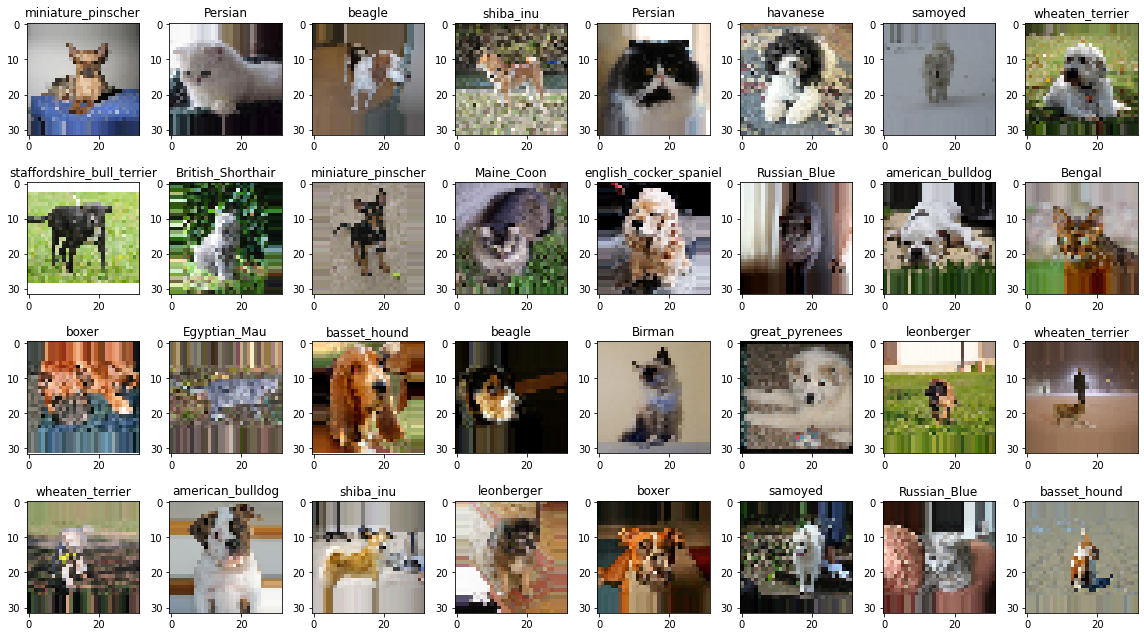

In [3]:
train_generator = DataGenerator(f"data/train.csv", f"data/classes.csv", 32, (32, 32))
label_names = train_generator.class_names
batch_x, batch_y = train_generator[5]

fig, axes = plt.subplots(nrows=4, ncols=8, figsize=[16, 9])
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i][j].set_title(label_names[batch_y[i*axes.shape[1]+j]])
        axes[i][j].imshow(batch_x[i*axes.shape[1]+j])

plt.tight_layout()
plt.show()



# CNN architecture

Write a simple tensorflow architecture for a convolutional neural network.
Use the [functional](!https://www.tensorflow.org/guide/keras/functional) api when writing the model.


In [4]:
OUTPUTS = 1
with open("data/classes.csv") as f:
    for line in f.readlines():
        class_id = int(line[:-1].split(",")[0])
        OUTPUTS = max(OUTPUTS, class_id+1)
print(OUTPUTS)
INPUT_SHAPE = (32, 32)
INPUT_SHAPE_RGB = (*INPUT_SHAPE, 3)
BATCH_SIZE = 32
EPOCHS = 10


def generate_test_train():
    with open("data/photos.csv", "r") as file:
        with open("data/test.csv", "w") as test:
            with open("data/train.csv", "w") as train:
                for line in file.readlines():
                    if random.random() < 0.2:
                        test.write(line)
                    else:
                        train.write(line)


def resnet_block(input_layer, filter_size=3, no_filters=16):
    layer1 = layers.Conv2D(kernel_size=filter_size, filters=no_filters, padding="same", activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(input_layer)
    layer2 = layers.Conv2D(kernel_size=filter_size, filters=no_filters, padding="same", activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(layer1)
    return layers.Add()([input_layer, layer2])


def build_mini_resnet(input_size, num_classes):
    inputs = layers.Input(shape=input_size)
    x = layers.Conv2D(kernel_size=3, filters=32, strides=2, kernel_regularizer=keras.regularizers.l2(0.001))(inputs)
    x = resnet_block(x, no_filters=32)
    x = resnet_block(x, no_filters=32)
    x = layers.Conv2D(kernel_size=3, filters=64, strides=2, kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = resnet_block(x, no_filters=64)
    x = resnet_block(x, no_filters=64)
    x = layers.Conv2D(kernel_size=3, filters=128, strides=2, kernel_regularizer=keras.regularizers.l2(0.001))(x)
    x = resnet_block(x, no_filters=128)
    x = layers.Flatten()(x)
    x = layers.Dense(num_classes)(x)
    return keras.Model(inputs=inputs, outputs=x, name="mini_resnet")


def plot_history(history_to_plot):
    plt.subplot(1, 2, 1)
    plt.plot(history_to_plot.history['accuracy'], label='accuracy')
    plt.plot(history_to_plot.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='upper right')
    plt.subplot(1, 2, 2)
    plt.plot(history_to_plot.history['loss'], label='loss')
    plt.plot(history_to_plot.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()


def save_model(model, name):
    test_generator = DataGenerator("data/test.csv", "data/classes.csv", BATCH_SIZE, INPUT_SHAPE)
    val_loss, val_acc = model.evaluate(test_generator, verbose=2)
    model.save(f"./weights/acc_{str(val_acc)[:5]}_{name}")


train_set = DataGenerator("data/train.csv", "data/classes.csv", BATCH_SIZE, INPUT_SHAPE)
test_set = DataGenerator("data/test.csv", "data/classes.csv", BATCH_SIZE, INPUT_SHAPE)


def train(optimizer, name):
    model = build_mini_resnet(INPUT_SHAPE_RGB, OUTPUTS)
    model.summary()

    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=optimizer,
        metrics=["accuracy"],
    )

    history = model.fit(x=train_set, validation_data=test_set, batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True)
    save_model(model, name)
    plot_history(history)


37


## Training and fine-tuning

Start by reading this blog [post](!http://karpathy.github.io/2019/04/25/recipe/), such that you can get an idea of the pipeline that you'll have to follow when training a model.

- Triple check that your data loading is correct. (Analyse your data.)
- Check that the setup is correct.
- Overfit a simple network.
- Add regularizations.
  - data augmentation
  - weight decay

Finetune the learning rate. Use learning rate decay; here in the [documentation](!https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/LearningRateSchedule) you have an example on how you can use a learning rate scheduler in tensorflow.

You should have at least 7 different trainings. Plot all the training history.

__Save all your models and their training history!__ 


Create a google spreadsheet or a markdown table in this notebook, and report the configuration and the accuracy for all these trains. 

### Other useful videos (bias and variance, basic recipe for training a deep NN)
- https://www.youtube.com/watch?v=NUmbgp1h64E 
- https://www.youtube.com/watch?v=SjQyLhQIXSM&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=2 
- https://www.youtube.com/watch?v=C1N_PDHuJ6Q&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=3 




Model: "mini_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 15, 15, 32)   896         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 15, 15, 32)   9248        ['conv2d[0][0]']                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 15, 15, 32)   9248        ['conv2d_1[0][0]']               
                                                                                        

2022-01-05 02:35:48.550329: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-05 02:35:48.598005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-05 02:35:48.598282: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-05 02:35:48.599035: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/10


2022-01-05 02:35:51.359372: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8300
2022-01-05 02:35:52.408571: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


 65/186 [=========>....................] - ETA: 13s - loss: 4.2390 - accuracy: 0.0457

Corrupt JPEG data: premature end of data segment


183/186 [============================>.] - ETA: 0s - loss: 3.9842 - accuracy: 0.0765

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


186/186 [==============================] - 29s 141ms/step - loss: 3.9756 - accuracy: 0.0780 - val_loss: 3.6176 - val_accuracy: 0.1126
Epoch 2/10
 14/186 [=>............................] - ETA: 18s - loss: 3.4733 - accuracy: 0.1317

Corrupt JPEG data: premature end of data segment


115/186 [=================>............] - ETA: 7s - loss: 3.4807 - accuracy: 0.1473

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


186/186 [==============================] - 25s 136ms/step - loss: 3.4466 - accuracy: 0.1509 - val_loss: 3.4873 - val_accuracy: 0.1381
Epoch 3/10
 10/186 [>.............................] - ETA: 19s - loss: 2.9433 - accuracy: 0.2562

Corrupt JPEG data: premature end of data segment


 20/186 [==>...........................] - ETA: 18s - loss: 3.0381 - accuracy: 0.2359

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


186/186 [==============================] - 25s 135ms/step - loss: 3.1531 - accuracy: 0.2127 - val_loss: 3.4584 - val_accuracy: 0.1541
Epoch 4/10
  2/186 [..............................] - ETA: 22s - loss: 2.6336 - accuracy: 0.3281

Corrupt JPEG data: premature end of data segment


 20/186 [==>...........................] - ETA: 18s - loss: 2.7964 - accuracy: 0.3172

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


186/186 [==============================] - 25s 135ms/step - loss: 2.9011 - accuracy: 0.2757 - val_loss: 3.4965 - val_accuracy: 0.1504
Epoch 5/10
 10/186 [>.............................] - ETA: 19s - loss: 2.5343 - accuracy: 0.4281

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


154/186 [=======================>......] - ETA: 3s - loss: 2.6274 - accuracy: 0.3582

Corrupt JPEG data: premature end of data segment


186/186 [==============================] - 25s 136ms/step - loss: 2.6594 - accuracy: 0.3528 - val_loss: 3.6954 - val_accuracy: 0.1490
Epoch 6/10
 76/186 [===========>..................] - ETA: 11s - loss: 2.2354 - accuracy: 0.4770

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


147/186 [======================>.......] - ETA: 4s - loss: 2.3586 - accuracy: 0.4498

Corrupt JPEG data: premature end of data segment


186/186 [==============================] - 25s 136ms/step - loss: 2.4145 - accuracy: 0.4336 - val_loss: 3.9763 - val_accuracy: 0.1497
Epoch 7/10
 59/186 [========>.....................] - ETA: 13s - loss: 1.8985 - accuracy: 0.5816

Corrupt JPEG data: premature end of data segment


168/186 [==========================>...] - ETA: 2s - loss: 2.0865 - accuracy: 0.5355

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


186/186 [==============================] - 25s 136ms/step - loss: 2.1181 - accuracy: 0.5281 - val_loss: 4.3524 - val_accuracy: 0.1592
Epoch 8/10
 16/186 [=>............................] - ETA: 18s - loss: 1.4224 - accuracy: 0.7871

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


 79/186 [===========>..................] - ETA: 11s - loss: 1.5814 - accuracy: 0.7120

Corrupt JPEG data: premature end of data segment


186/186 [==============================] - 25s 137ms/step - loss: 1.8037 - accuracy: 0.6458 - val_loss: 5.0277 - val_accuracy: 0.1475
Epoch 9/10
 11/186 [>.............................] - ETA: 17s - loss: 1.3041 - accuracy: 0.8267

Corrupt JPEG data: premature end of data segment


118/186 [==================>...........] - ETA: 7s - loss: 1.3536 - accuracy: 0.8051

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


186/186 [==============================] - 26s 137ms/step - loss: 1.4869 - accuracy: 0.7653 - val_loss: 5.8103 - val_accuracy: 0.1359
Epoch 10/10
153/186 [=======================>......] - ETA: 3s - loss: 1.2170 - accuracy: 0.8644

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


186/186 [==============================] - ETA: 0s - loss: 1.2608 - accuracy: 0.8503

Corrupt JPEG data: premature end of data segment


186/186 [==============================] - 26s 138ms/step - loss: 1.2608 - accuracy: 0.8503 - val_loss: 6.4612 - val_accuracy: 0.1512
43/43 - 5s - loss: 6.4795 - accuracy: 0.1483 - 5s/epoch - 112ms/step


2022-01-05 02:40:12.257449: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./weights/acc_0.148_adam_1e3-3/assets


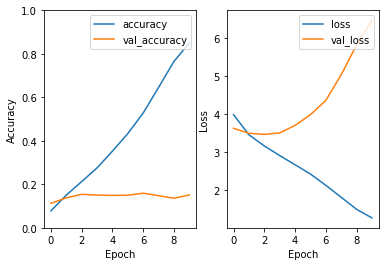

In [5]:
train(keras.optimizers.Adam(1e-3), "adam_1e3-3")

Model: "mini_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 31, 31, 16)   448         ['input_2[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 31, 31, 16)   2320        ['conv2d_5[0][0]']               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 31, 31, 16)   2320        ['conv2d_6[0][0]']               
                                                                                        

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


826/826 [==============================] - ETA: 0s - loss: 1.6521 - accuracy: 0.5993

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 27s 32ms/step - loss: 1.6521 - accuracy: 0.5993 - val_loss: 0.7455 - val_accuracy: 0.6277
Epoch 2/10
314/826 [==========>...................] - ETA: 14s - loss: 0.7247 - accuracy: 0.6266

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


824/826 [============================>.] - ETA: 0s - loss: 0.7288 - accuracy: 0.6215

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 27s 32ms/step - loss: 0.7291 - accuracy: 0.6209 - val_loss: 0.7321 - val_accuracy: 0.6114
Epoch 3/10
293/826 [=========>....................] - ETA: 16s - loss: 0.7231 - accuracy: 0.6152

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


826/826 [==============================] - ETA: 0s - loss: 0.7276 - accuracy: 0.6185

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 27s 33ms/step - loss: 0.7276 - accuracy: 0.6185 - val_loss: 0.7523 - val_accuracy: 0.6141
Epoch 4/10
 21/826 [..............................] - ETA: 23s - loss: 0.7969 - accuracy: 0.6012

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


826/826 [==============================] - ETA: 0s - loss: 0.7292 - accuracy: 0.6200

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 27s 32ms/step - loss: 0.7292 - accuracy: 0.6200 - val_loss: 0.7401 - val_accuracy: 0.5965
Epoch 5/10
158/826 [====>.........................] - ETA: 19s - loss: 0.6996 - accuracy: 0.6250

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


826/826 [==============================] - ETA: 0s - loss: 0.7287 - accuracy: 0.6158

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 27s 33ms/step - loss: 0.7287 - accuracy: 0.6158 - val_loss: 0.7388 - val_accuracy: 0.6101
Epoch 6/10
491/826 [================>.............] - ETA: 9s - loss: 0.7237 - accuracy: 0.6275

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


826/826 [==============================] - 27s 32ms/step - loss: 0.7255 - accuracy: 0.6233 - val_loss: 0.7351 - val_accuracy: 0.6196


Corrupt JPEG data: premature end of data segment


Epoch 7/10
494/826 [================>.............] - ETA: 9s - loss: 0.7230 - accuracy: 0.6255

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


826/826 [==============================] - ETA: 0s - loss: 0.7276 - accuracy: 0.6217

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 27s 33ms/step - loss: 0.7276 - accuracy: 0.6217 - val_loss: 0.7430 - val_accuracy: 0.6277
Epoch 8/10
257/826 [========>.....................] - ETA: 16s - loss: 0.7281 - accuracy: 0.6260

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


825/826 [============================>.] - ETA: 0s - loss: 0.7305 - accuracy: 0.6167

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 27s 32ms/step - loss: 0.7303 - accuracy: 0.6168 - val_loss: 0.7458 - val_accuracy: 0.6101
Epoch 9/10
102/826 [==>...........................] - ETA: 20s - loss: 0.7109 - accuracy: 0.6238

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


825/826 [============================>.] - ETA: 0s - loss: 0.7271 - accuracy: 0.6221

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 26s 32ms/step - loss: 0.7269 - accuracy: 0.6221 - val_loss: 0.7413 - val_accuracy: 0.6264
Epoch 10/10
290/826 [=========>....................] - ETA: 15s - loss: 0.7247 - accuracy: 0.6284

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


826/826 [==============================] - ETA: 0s - loss: 0.7274 - accuracy: 0.6227

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 27s 32ms/step - loss: 0.7274 - accuracy: 0.6227 - val_loss: 0.7490 - val_accuracy: 0.6073


Corrupt JPEG data: premature end of data segment


92/92 - 3s - loss: 0.7533 - accuracy: 0.5951 - 3s/epoch - 31ms/step
INFO:tensorflow:Assets written to: ./weights/acc_0.595_adam_exp_decay/assets


/run/media/flaviu/Storage/Uni Stuff/Semester 5/Computer Vision and Deep Learning/venv/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/run/media/flaviu/Storage/Uni Stuff/Semester 5/Computer Vision and Deep Learning/venv/lib/python3.9/site-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


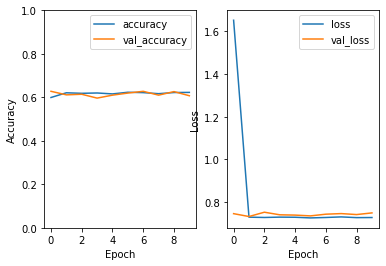

In [7]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=1e-3,
                decay_steps=5,
                decay_rate=0.96)
train(keras.optimizers.Adam(lr_schedule), "adam_exp_decay")

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=5e-3,
                decay_steps=10,
                decay_rate=0.96)
train(keras.optimizers.Adam(lr_schedule), "adam_exp_decay_v2")

Model: "mini_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_15 (Conv2D)             (None, 31, 31, 16)   448         ['input_4[0][0]']                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 31, 31, 16)   2320        ['conv2d_15[0][0]']              
                                                                                                  
 conv2d_17 (Conv2D)             (None, 31, 31, 16)   2320        ['conv2d_16[0][0]']              
                                                                                        

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


826/826 [==============================] - ETA: 0s - loss: 3.1789 - accuracy: 0.6483

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 28s 33ms/step - loss: 3.1789 - accuracy: 0.6483 - val_loss: 0.6401 - val_accuracy: 0.6522
Epoch 2/10
481/826 [================>.............] - ETA: 10s - loss: 0.6286 - accuracy: 0.6681

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


826/826 [==============================] - ETA: 0s - loss: 0.6289 - accuracy: 0.6660

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 27s 33ms/step - loss: 0.6289 - accuracy: 0.6660 - val_loss: 0.6432 - val_accuracy: 0.6549
Epoch 3/10
137/826 [===>..........................] - ETA: 20s - loss: 0.6218 - accuracy: 0.6843

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


826/826 [==============================] - ETA: 0s - loss: 0.6245 - accuracy: 0.6731

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 27s 33ms/step - loss: 0.6245 - accuracy: 0.6731 - val_loss: 0.6367 - val_accuracy: 0.6576
Epoch 4/10
609/826 [=====================>........] - ETA: 6s - loss: 0.6301 - accuracy: 0.6724

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


826/826 [==============================] - ETA: 0s - loss: 0.6254 - accuracy: 0.6743

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 26s 32ms/step - loss: 0.6254 - accuracy: 0.6743 - val_loss: 0.6445 - val_accuracy: 0.6562
Epoch 5/10
 69/826 [=>............................] - ETA: 21s - loss: 0.6300 - accuracy: 0.6739

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


825/826 [============================>.] - ETA: 0s - loss: 0.6249 - accuracy: 0.6720

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 27s 32ms/step - loss: 0.6250 - accuracy: 0.6719 - val_loss: 0.6425 - val_accuracy: 0.6549
Epoch 6/10
778/826 [===========================>..] - ETA: 1s - loss: 0.6250 - accuracy: 0.6724

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


825/826 [============================>.] - ETA: 0s - loss: 0.6252 - accuracy: 0.6723

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 26s 32ms/step - loss: 0.6250 - accuracy: 0.6724 - val_loss: 0.6413 - val_accuracy: 0.6549
Epoch 7/10
269/826 [========>.....................] - ETA: 15s - loss: 0.6317 - accuracy: 0.6640

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


826/826 [==============================] - 26s 32ms/step - loss: 0.6259 - accuracy: 0.6704 - val_loss: 0.6412 - val_accuracy: 0.6522
Epoch 8/10
588/826 [====================>.........] - ETA: 6s - loss: 0.6289 - accuracy: 0.6673

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


826/826 [==============================] - ETA: 0s - loss: 0.6247 - accuracy: 0.6716

Corrupt JPEG data: premature end of data segment


826/826 [==============================] - 26s 32ms/step - loss: 0.6247 - accuracy: 0.6716 - val_loss: 0.6312 - val_accuracy: 0.6549
Epoch 9/10
602/826 [====================>.........] - ETA: 6s - loss: 0.6231 - accuracy: 0.6732

### **Extra credit**

Implement the learning rate scheduler described in the [paper](!https://arxiv.org/pdf/1608.03983.pdf) "SGDR: Stochastic gradient descent with warm restarts". You are mostly interested in Section 3 from the paper.

In [ ]:
# TODO optional extra credit assignment

## Ensembles
 
Pick your N (3 or 5) of the networks that you've trained and create an ensemble. The prediction of the ensemble is just the average of the predictions of the N networks.
 
Evaluate the ensemble (your accuracy should boost by at least 1.5%).


In [ ]:
def make_ensemble(input_size, paths):
    inputs = layers.Input(shape=input_size)
    models = [keras.models.load_model(path) for path in paths]
    for i, ensemble_model in enumerate(models):
        ensemble_model._name += str(i)
    x = layers.Average()([model(inputs) for model in models])
    return keras.Model(inputs=inputs, outputs=x, name="ensemble")


model = make_ensemble(INPUT_SHAPE_RGB, [
    "weights/acc_0.604_adam_exp_decay",
    "weights/acc_0.658_adam_1e3-3",
    "weights/acc_0.661_adam_1e3-3/"
])
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )
val_loss, val_acc = model.evaluate(test_set, verbose=2)

# Transfer learning and fine-tuning
 
In the _tensorflow.keras.applications_ module you can find implementations of several well known CNN architectures (most of the models that we covered during the lecture), as well as the pretrained weights of these models on the ImageNet dataset. 
You can use this module to apply transfer learning and fine-tuning for your classification problem. [Here](!https://keras.io/api/applications/) you can find a comprehensive table with the size of the models, number of parameters, top-1 and top-5 accuracy on the ImageNet dataset.
 
When using deep neural networks, transfer learning is the norm, not the exception.  Transfer learning refers to the situation where what has been learned in one setting is used to improve generalization in another setting.
The transfer learning pipeline can be summarized as follows:
- get the weights of a model trained on similar classification problem (for which more training data is available);
- remove the final classification layer;
- freeze the weights (don't update them during the training process); these layers would be used as a feature extractor;
- add a/some trainable layers over the frozen layers. They will learn how the extracted features can be used to distinguish between the classes of your classification problem.
- train these new layers on your dataset.
 
Next, you can also use fine-tuning. During fine-tuning you will unfreeze the model (or a larger part of the model), and train it on the new data with a very low learning rate.
 
Follow this [tutorial](!https://keras.io/guides/transfer_learning/) to solve this exercise.
 
When following the tutorial
- pay attention to the discussion about the BatchNormalization layers;
- you can skip the section "Transfer learning & fine-tuning with a custom training loop", we'll cover this in the next laboratory;
- pay attention to the loss that you will be using when training your model. In the tutorial the loss is the binary cross entropy loss which is suitable for binary classification problems. If your problem is multi-class you should use the categorical cross entropy loss.
- use the pre-processing required by the network architecture that you chose.
 
To sum up, pick a neural network architecture from the _tensorflow.keras.applications_ module and use transfer learning and fine tuning to train it to classify the images from your dataset (you should use the custom DataGenerator that you wrote for this). 
 Briefly describe the key features of the neural network architecture that you chose and why you chose it.
 
Apply transfer learning (with at least one config for the hyperparameters) and report the performance. Apply fine-tuning  (with at least one config for the hyperparameters) and report the performance.
Finally, plot the performance of the model when you used only transfer learning and the performance of the model when you also used fine-tuning on the same plot.
 
I chose the architecture <font color='red'> TODO </font> , because <font color='red'> TODO </font> .
The key features of this architecture are
- <font color='red'> TODO  </font> 
- <font color='red'> TODO  </font> 
- <font color='red'> TODO  </font> 
 
How does the performance of this fine-tuned model compare to the performance of the network that you trained from scratch?
 




In [ ]:
# TODO your transfer-learning and fine-tuning step